Github Repository: https://github.com/catebros/ML-fundamentals-2025/tree/main

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import scipy
from IPython.display import display

path = 'hour.csv'


research: paper,previous work, his notebooks

class imbalance, feature selection

iteratons: outliers (reove based on 1.5 iqr, 3iqr based on features, dont delete them), train/test/valid split

class:
- Lecture 3: Data: errors, dealing with missing values
- Lecture 4: Data imbalance, encoders
- Lecture 5: Feature engineering, encoding, selection, scaling
- Lecture 6: Supervised Learning ALgorithms
- Lecture 7: Pipeline + Performance Metrics
- Lecture 8: Performance Metrics
- Lecture 9 -10: Hyperparameter tuning, bias, regularization
- Lecture 11: Graph
- Lecture 12: Data leakage

# Task 1: Exploratory Data Analysis (EDA)
Lecture material: Lecture 6 (slides 4–16), Lecture 7(slides 3–9), Lecture 8(slides 2–5)
- Load the hour.csv dataset. (Done)
- Examine the target variable (cnt) distribution and identify its skewness. (Done)
- Explore analytically the influence of temporal (hr, weekday, mnth, season), binary (holiday, workingday), and weather-related features(temp, atemp, hum, windspeed, weathersit) on cnt
- Visualize relationships using, forexample, scatterplots, boxplots, and line plots grouped by hour,day,and season, or any other analysis/plot you deem necessary
- Identify any suspicious patterns, outliers, or anomalies.
- Consider dropping the columns instant, dteday, casual, and registered

## Inital exploration

In [124]:
df = pd.read_csv(path)

In [125]:
df.shape

(17379, 17)

In [126]:
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [127]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [128]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

 **Variables of the dataset**
- Temporal:
    - dteday
    - season
    - yr
    - mnth
    - hr
    - weekday
- Binary:
    - holiday
    - workingday
- Weather:
    - Categorical:
        - weathersit
    - Numerical:
        - temp
        - atemp
        - hum
        - windspeed
- Other:
    - instant
    - casual
    - registered
- Target:
    - cnt



### Missing values:

In [129]:
df.duplicated().sum()

0

In [130]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

further: what if placeholder values

## Basic Count plots

In [131]:
df['cnt'].max()

977

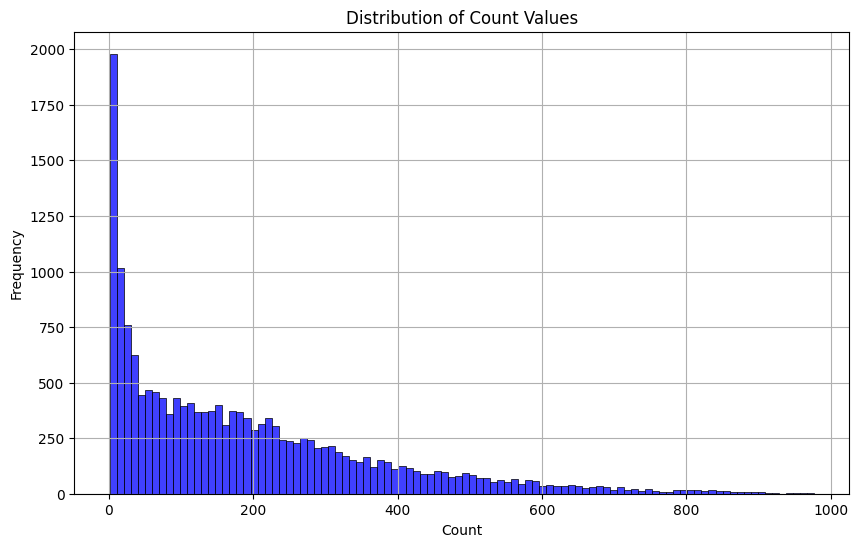

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=100, color='blue')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Count Values')
plt.grid(True)
plt.show()

### Skewness

Visually we can say that the data is right skewed, however is better to find a real quantitative measure to asses this, that why we can use the .skew() function, if the value is higher than zero it haves a right tail (Right skewness), if we also compare the mean and median we can see there is a significant difference of 45 units??, or a 4% difference if we take into account the range of values, confirming a moderate right skewness. 

In [133]:
from scipy.stats import skew

skewness = skew(df["cnt"])
print("Skewness:", skewness)

mean_value = df["cnt"].mean()
median_value = df["cnt"].median()

print("Mean:", mean_value)
print("Median:", median_value)
print("Proportion of difference", abs(mean_value - median_value)/df['cnt'].max() *100, "%")

Skewness: 1.2773013463494975
Mean: 189.46308763450142
Median: 142.0
Proportion of difference 4.858043770163912 %


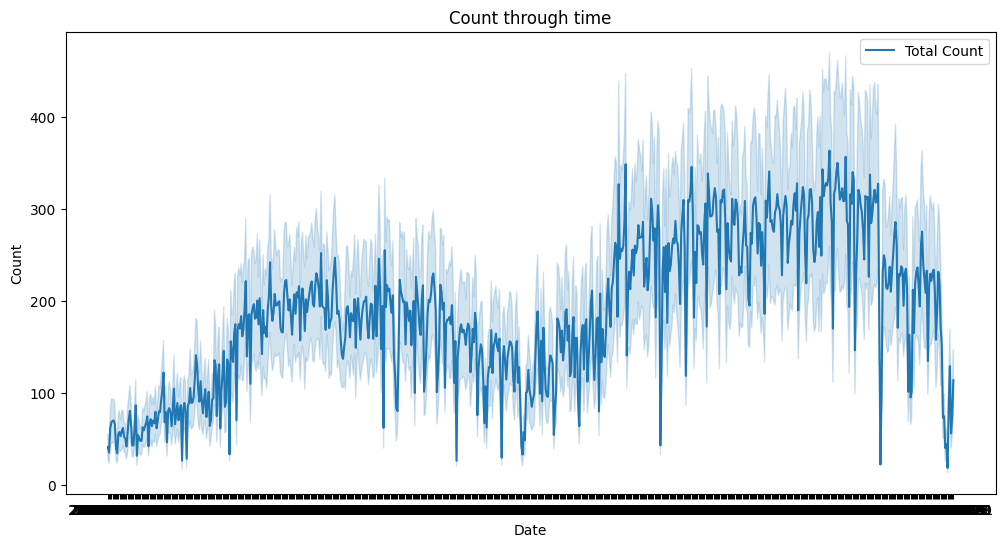

In [134]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['dteday'], y=df['cnt'], label='Total Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count through time')
plt.legend()
plt.show()

### Outliers

#### 1.5 * IQR

In [135]:
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
print(f"Number of outliers in 'cnt': {outliers.shape[0]}")

Number of outliers in 'cnt': 505


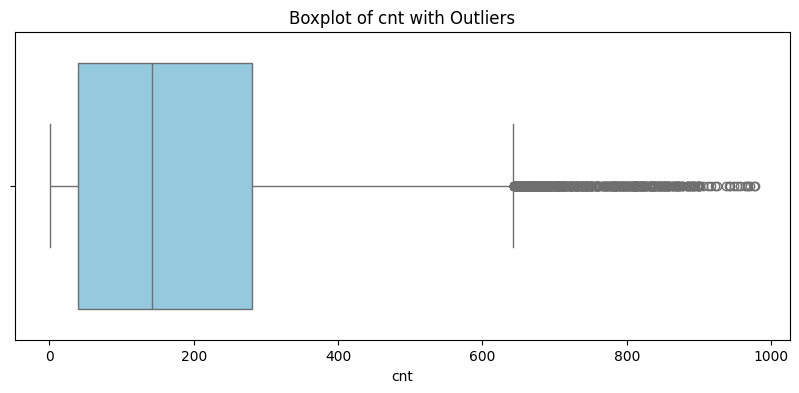

In [136]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['cnt'], color='skyblue')
plt.title("Boxplot of cnt with Outliers")
plt.xlabel("cnt")
plt.show()

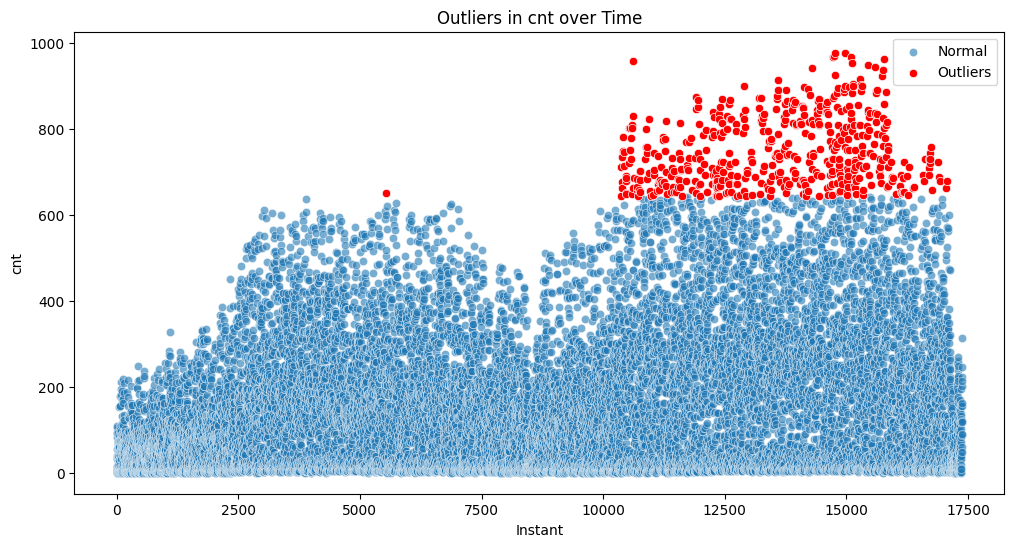

In [137]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='instant', y='cnt', data=df, label='Normal', alpha=0.6)
sns.scatterplot(x='instant', y='cnt', data=outliers, color='red', label='Outliers')
plt.title("Outliers in cnt over Time")
plt.xlabel("Instant")
plt.ylabel("cnt")
plt.legend()
plt.show()

Based on the plot we can see that there are some data points that are outside the 1.5 IQR, which is a common threshold for identifying outliers. However, we need to be careful when interpreting these outliers, as they may not necessarily be errors or anomalies, it can be more due to a increasing trend in the data.

Becouse of this, I prefer not to remove them, but to keep them in the dataset and analyze them further through each feature.

#### 3 * IQR

In [138]:
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
print(f"Number of outliers in 'cnt': {outliers.shape[0]}")

Number of outliers in 'cnt': 0


A 3 IQR threshold is a more strict threshold for identifying outliers, and it can help to identify extreme values that may be affecting the analysis. As we can see there are no data points that are outside the 3 IQR threshold, which suggests that the data is relatively clean and does not contain any extreme outliers. However, we still need to be careful when interpreting the data, as there may be other factors that are affecting the analysis.

#### 2.5 * IQR

In [139]:
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
print(f"Number of outliers in 'cnt': {outliers.shape[0]}")

Number of outliers in 'cnt': 37


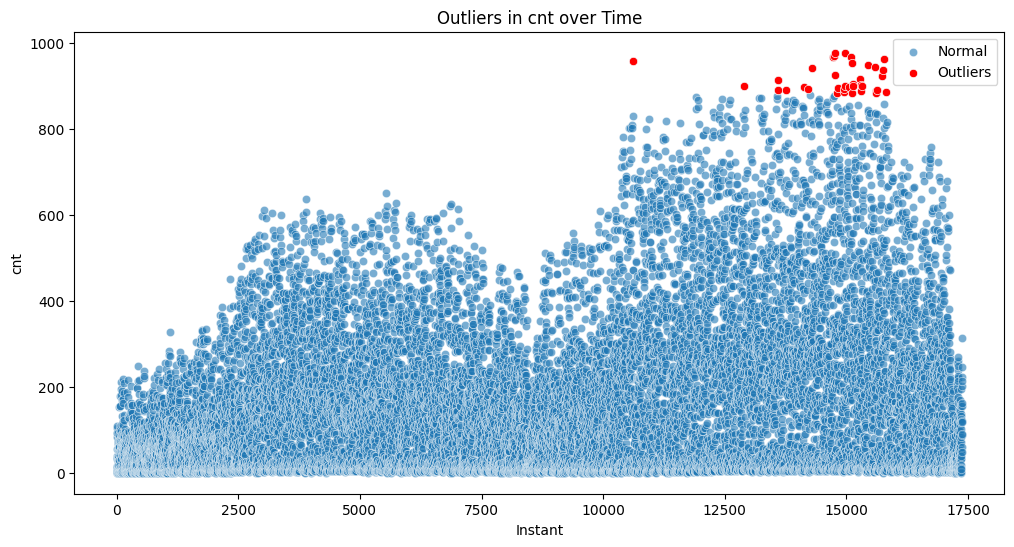

In [140]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='instant', y='cnt', data=df, label='Normal', alpha=0.6)
sns.scatterplot(x='instant', y='cnt', data=outliers, color='red', label='Outliers')
plt.title("Outliers in cnt over Time")
plt.xlabel("Instant")
plt.ylabel("cnt")
plt.legend()
plt.show()

With a 2.5 IQR threshold, we can see that the selected outliers make more sense, the values in red are more extreme and keep the rest of the data points in a more reasonable range.

## Temporal features

- dteday
- season
- yr
- mnth
- hr
- weekday

### Date = dteday

THe dteday column is a date column that contains the date of each observation. In this dataset, they have already extracted the year, month, day, and hour from the date column and created separate columns for each of these features. This is a common practice in time series analysis, as it allows us to analyze the data at different levels of granularity.

We need to check if the dataset is full for each hour in each day of the calendar.

In [141]:
missing_dteday = df['dteday'].isnull().sum()
print(f"Missing values in 'dteday': {missing_dteday}")

Missing values in 'dteday': 0


In [142]:
hour_counts = df.groupby('dteday')['hr'].nunique().reset_index()
incomplete_days = hour_counts[hour_counts['hr'] < 24]

print(f"Number of days with missing hourly data: {len(incomplete_days)}")
display(incomplete_days.sort_values('hr').sort_values('dteday'))
for date in incomplete_days['dteday']:
    hours_present = set(df[df['dteday'] == date]['hr'])
    missing_hours = sorted(set(range(24)) - hours_present)
    print(f"{date} is missing hours: {missing_hours}")

Number of days with missing hourly data: 76


dteday  hr
1    2011-01-02  23
2    2011-01-03  22
3    2011-01-04  23
4    2011-01-05  23
5    2011-01-06  23
..          ...  ..
668  2012-10-30  11
677  2012-11-08  23
698  2012-11-29  23
723  2012-12-24  23
724  2012-12-25  23

[76 rows x 2 columns]

2011-01-02 is missing hours: [5]
2011-01-03 is missing hours: [2, 3]
2011-01-04 is missing hours: [3]
2011-01-05 is missing hours: [3]
2011-01-06 is missing hours: [3]
2011-01-07 is missing hours: [3]
2011-01-11 is missing hours: [3, 4]
2011-01-12 is missing hours: [3, 4]
2011-01-14 is missing hours: [4]
2011-01-18 is missing hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
2011-01-19 is missing hours: [3]
2011-01-22 is missing hours: [5]
2011-01-23 is missing hours: [4]
2011-01-24 is missing hours: [2]
2011-01-25 is missing hours: [3]
2011-01-26 is missing hours: [3, 4, 18, 19, 20, 21, 22, 23]
2011-01-27 is missing hours: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
2011-01-28 is missing hours: [4]
2011-01-29 is missing hours: [5]
2011-01-30 is missing hours: [6]
2011-02-01 is missing hours: [4]
2011-02-03 is missing hours: [4]
2011-02-04 is missing hours: [4]
2011-02-09 is missing hours: [4]
2011-02-10 is missing hours: [3]
2011-02-11 is missing hours: [3, 4]
2011-02-13 is mis

Lord, this means that the there 76 days with atleast 1 hour of data missing. This is bad, because it means that we cannot use the data for those days in our analysis. We need to find a way to fill in the missing data, or remove those days from the dataset.

### Season = season

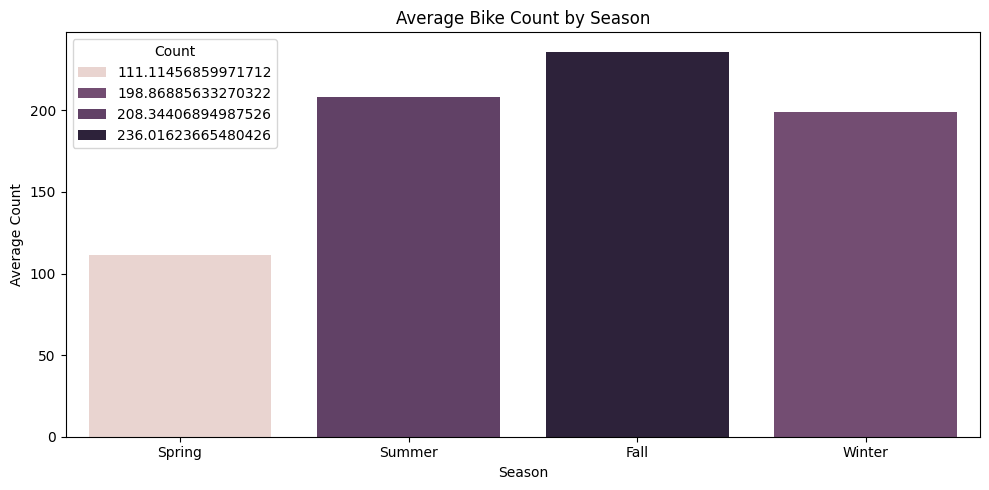

In [143]:
season_avg = df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=season_avg, x='season', y='cnt', hue= 'cnt')

plt.title("Average Bike Count by Season")
plt.xlabel("Season")
plt.ylabel("Average Count")
plt.xticks(ticks=range(4), labels=["Spring", "Summer", "Fall", "Winter"])
plt.legend(title='Count')
plt.tight_layout()
plt.show()

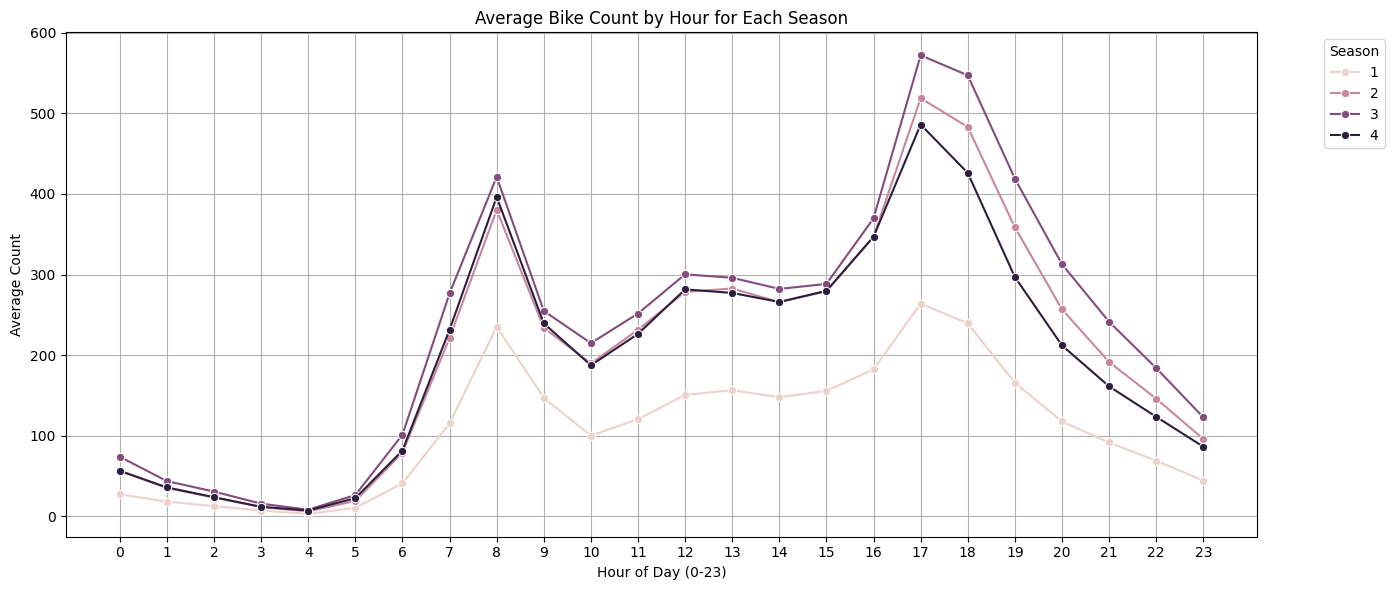

In [144]:
season_hour_avg = df.groupby(['season', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=season_hour_avg, x='hr', y='cnt', hue='season', marker='o')

plt.title("Average Bike Count by Hour for Each Season")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Average Count")
plt.grid(True)
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [145]:
weather_mapping = {
    1: "Clear, Few clouds, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

# Crear un DataFrame temporal para la visualización en lugar de modificar el original
temp_df = df.copy()
temp_df['weather_situation'] = temp_df['weathersit'].map(weather_mapping)
temp_df['season_name'] = temp_df['season'].map(season_mapping)

weather_count_by_year_season = temp_df.groupby(['yr', 'season_name', 'weather_situation']).size().reset_index(name='count')
weather_count_by_year_season['yr'] = weather_count_by_year_season['yr'].map({0: '2011', 1: '2012'})

print(weather_count_by_year_season)


      yr season_name                                  weather_situation  count
0   2011        Fall                   Clear, Few clouds, Partly cloudy   1625
1   2011        Fall  Light Snow, Light Rain + Thunderstorm + Scatte...    147
2   2011        Fall  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...    468
3   2011      Spring                   Clear, Few clouds, Partly cloudy   1300
4   2011      Spring  Heavy Rain + Ice Pallets + Thunderstorm + Mist...      1
5   2011      Spring  Light Snow, Light Rain + Thunderstorm + Scatte...    177
6   2011      Spring  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...    590
7   2011      Summer                   Clear, Few clouds, Partly cloudy   1364
8   2011      Summer  Light Snow, Light Rain + Thunderstorm + Scatte...    219
9   2011      Summer  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...    620
10  2011      Winter                   Clear, Few clouds, Partly cloudy   1356
11  2011      Winter  Light Snow, Light Rain + Thund

### Year = yr

Just by looking before at the outlier plots, we know thaht year its going to be a very important feature, since the data is from 2011 and 2012, and we can see that the values are increasing over time. 

In [146]:
yearly_stats = df.groupby('yr')['cnt'].agg(['mean', 'sum']).reset_index()
yearly_stats['yr'] = yearly_stats['yr'].map({0: '2011', 1: '2012'})

print(yearly_stats)

     yr        mean      sum
0  2011  143.794448  1243103
1  2012  234.666361  2049576


Based on the mean and the sum of the cnt, we can see that the year 2012 has a higher mean and sum than the year 2011, which suggests that there was an increase in bike rentals in 2012. This is consistent with the trend we observed in the previous plot, where we saw an increase in bike rentals over time.

### Month = mnth

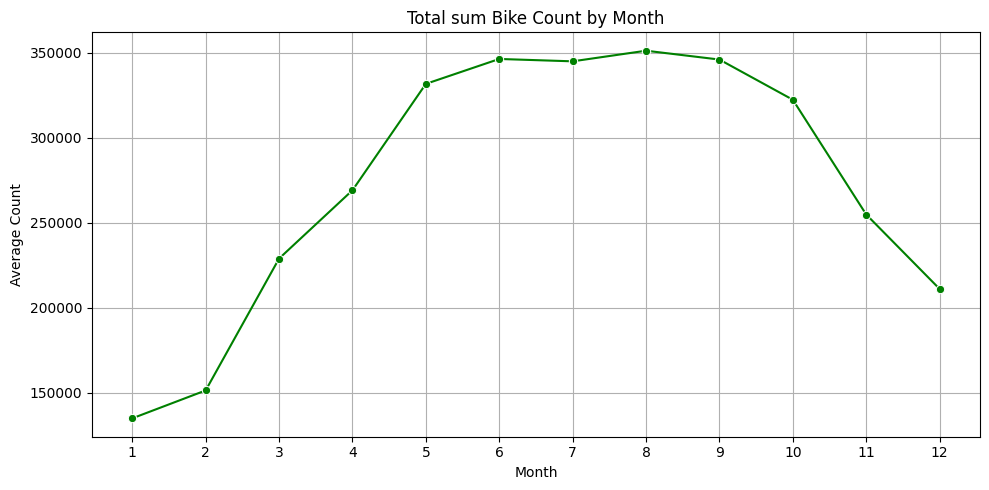

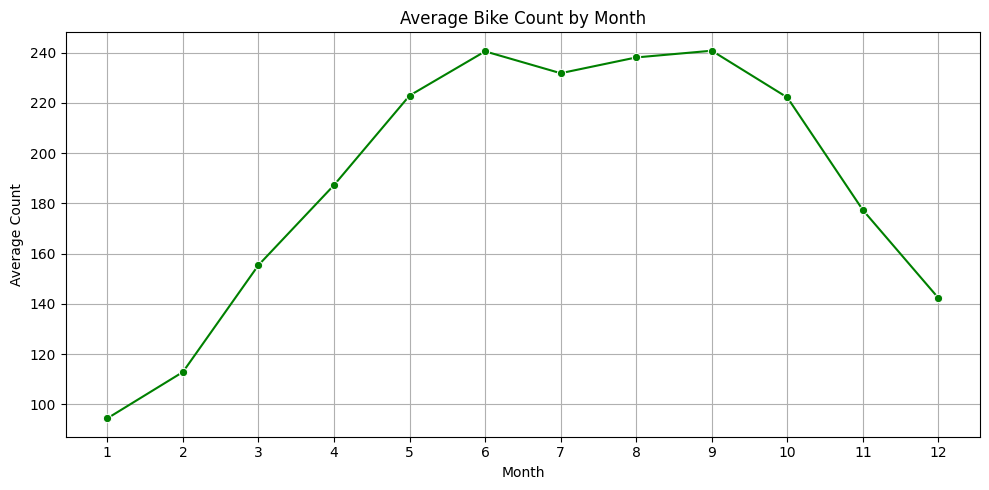

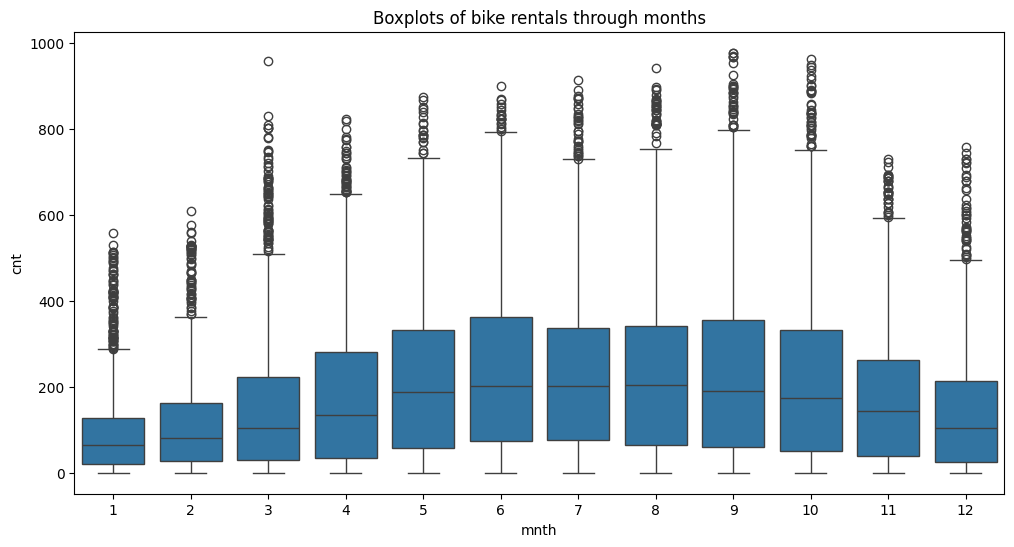

In [147]:
monthly_sum = df.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sum, x='mnth', y='cnt', marker='o', color='green')

plt.title("Total sum Bike Count by Month")
plt.xlabel("Month")
plt.ylabel("Average Count")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_avg = df.groupby('mnth')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='mnth', y='cnt', marker='o', color='green')

plt.title("Average Bike Count by Month")
plt.xlabel("Month")
plt.ylabel("Average Count")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Boxplots of bike rentals through months')
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different months')]

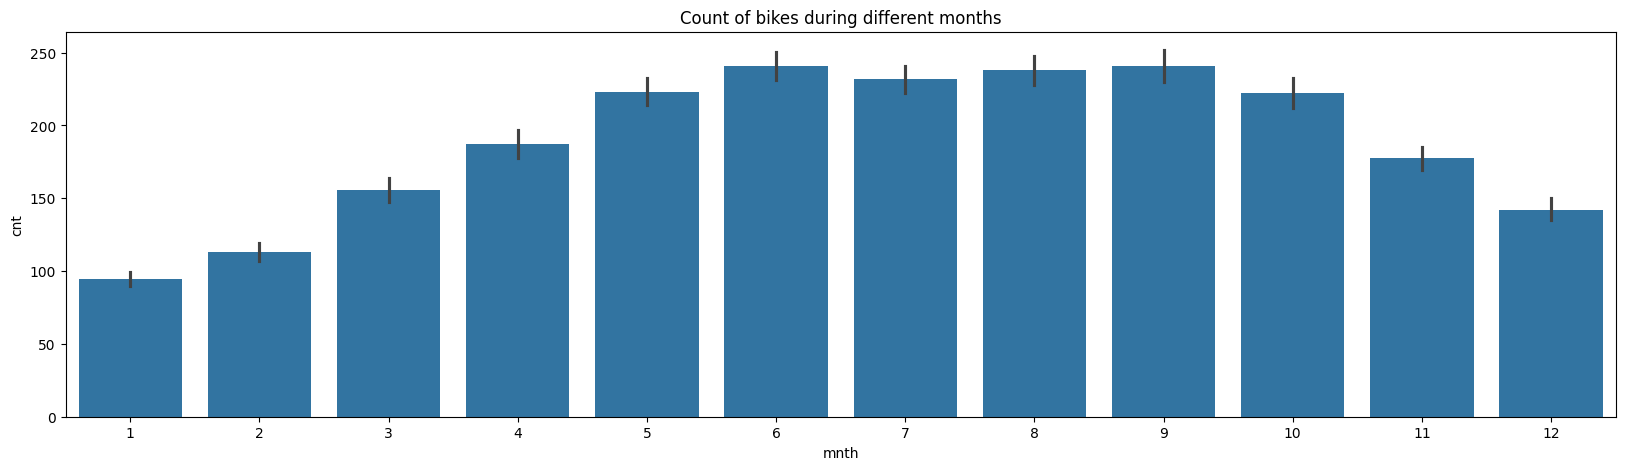

In [148]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

We can see that the cnt is higher in the summer months, which is consistent with the idea that people are more likely to use bikes in warmer weather.Specially in June and Spetember, which are the months with the highest cnt values. This is likely due to its still school season, which means that people are more likely to use bikes for commuting to work or school. In contrast, the months of January and February have the lowest cnt values, which is likely due to the colder weather and the fact that people are less likely to use bikes during this time.

### Hour = hr

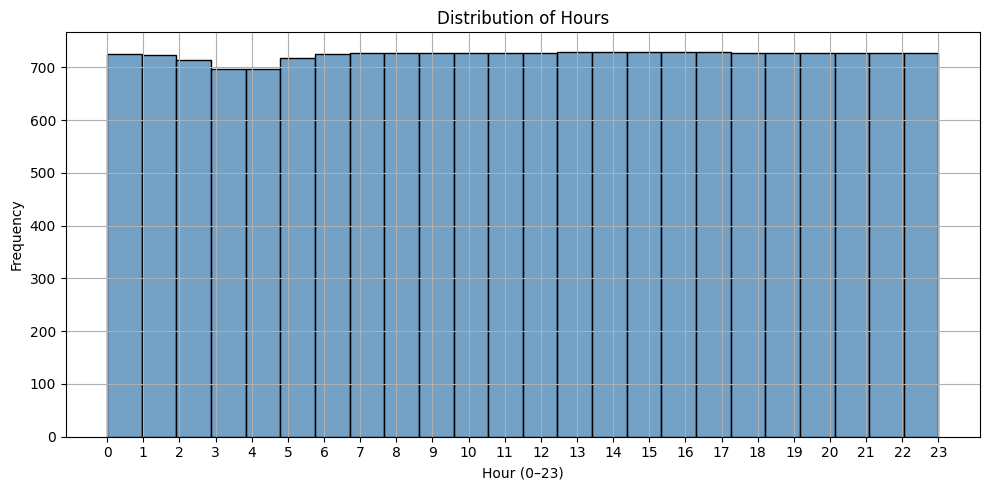

In [149]:
plt.figure(figsize=(10, 5))
sns.histplot(df['hr'], bins=24, kde=False, color='steelblue', edgecolor='black')
plt.title('Distribution of Hours')
plt.xlabel('Hour (0–23)')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Bad news, it looks like there are missing values at 2, 3, 4 am. 

In [150]:
print("Unique hour values:", sorted(df['hr'].unique()))

outliers = df[(df['hr'] < 0) | (df['hr'] > 23)]
print(f"Number of outliers in 'hr': {len(outliers)}")

Unique hour values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Number of outliers in 'hr': 0


No outliers found on the hour feature, which is good.

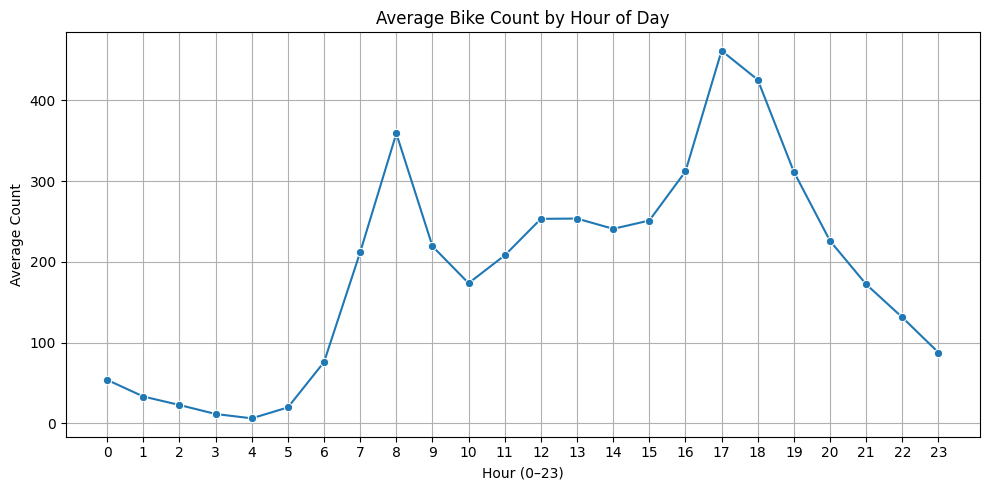

In [151]:
hourly_avg = df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_avg, x='hr', y='cnt', marker='o')
plt.title("Average Bike Count by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Average Count")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

We can see hat we have 2 peak hours, one at 8 am and another at 5 pm, which are the hours when people are going to work and coming back home. It can be interesting to create feature called peak hours 
(1 if the hour is between 7 and 9 am or between 5 and 7 pm, 0 otherwise), to see if this feature can help us to improve the model performance.

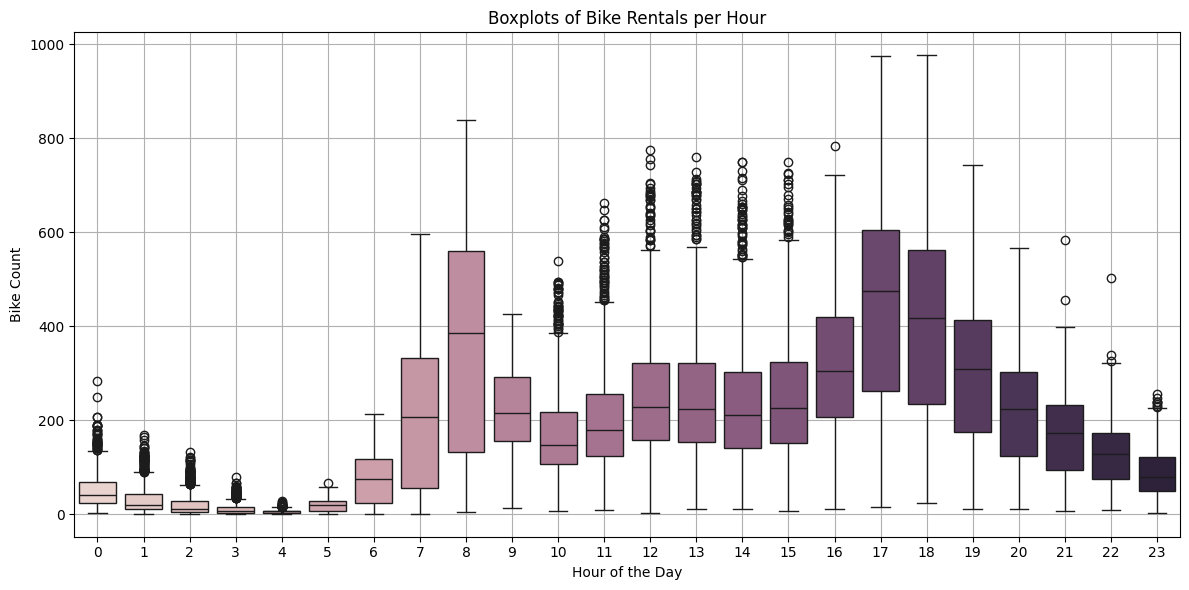

In [152]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='hr', y='cnt', data=df, hue = 'hr', legend=False)
plt.title('Boxplots of Bike Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

### Weekday = weekday

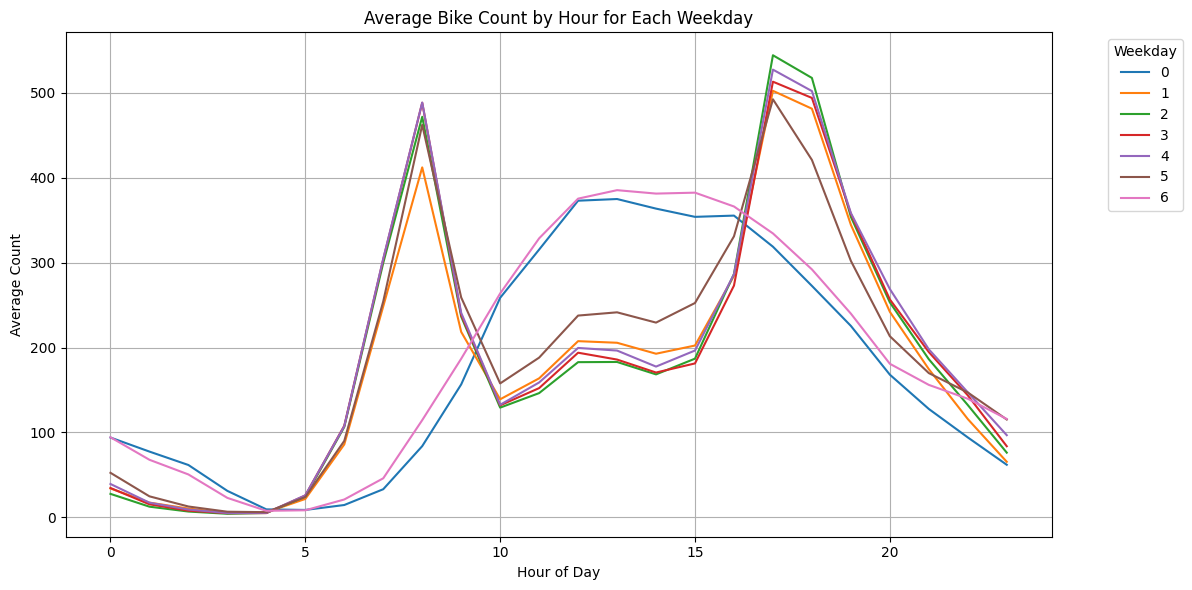

In [153]:
grouped = df.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='hr', y='cnt', hue='weekday', palette='tab10')

plt.title("Average Bike Count by Hour for Each Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the plot we can see 2 distinct groups, having a different patron? . The first group is composed of the weekdays (1-5) and the second group is composed of the weekends (6 and 0). This suggests that there is a significant difference in bike rentals between weekdays and weekends, which may be due to differences in demand for bike rentals on these days. it migh be more interesting to create a featyre that combines the weekday and weekend data, such as a binary feature that indicates whether the day is a weekday or weekend. This could help to simplify the analysis and make it easier to interpret the results.

[Text(0.5, 1.0, 'Count of bikes during different days')]

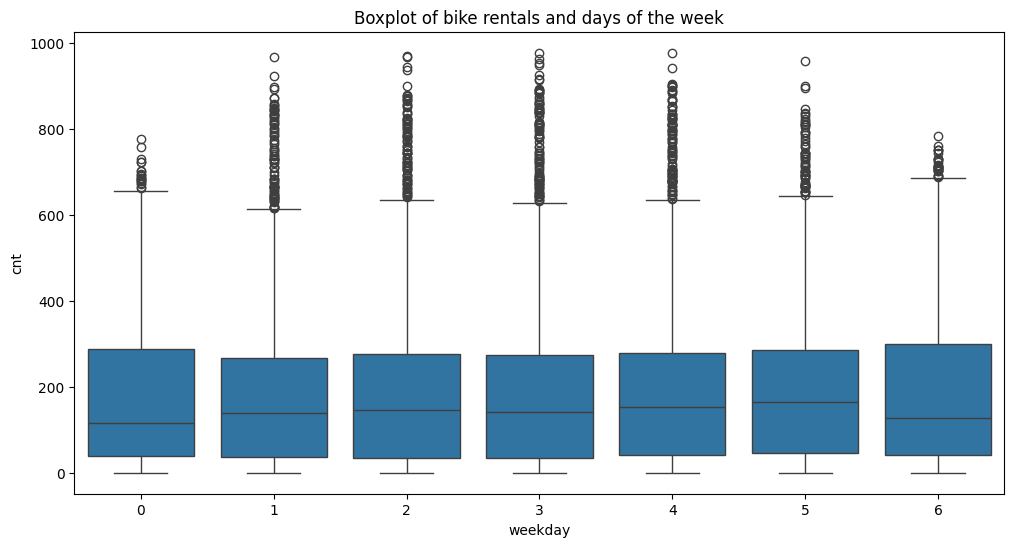

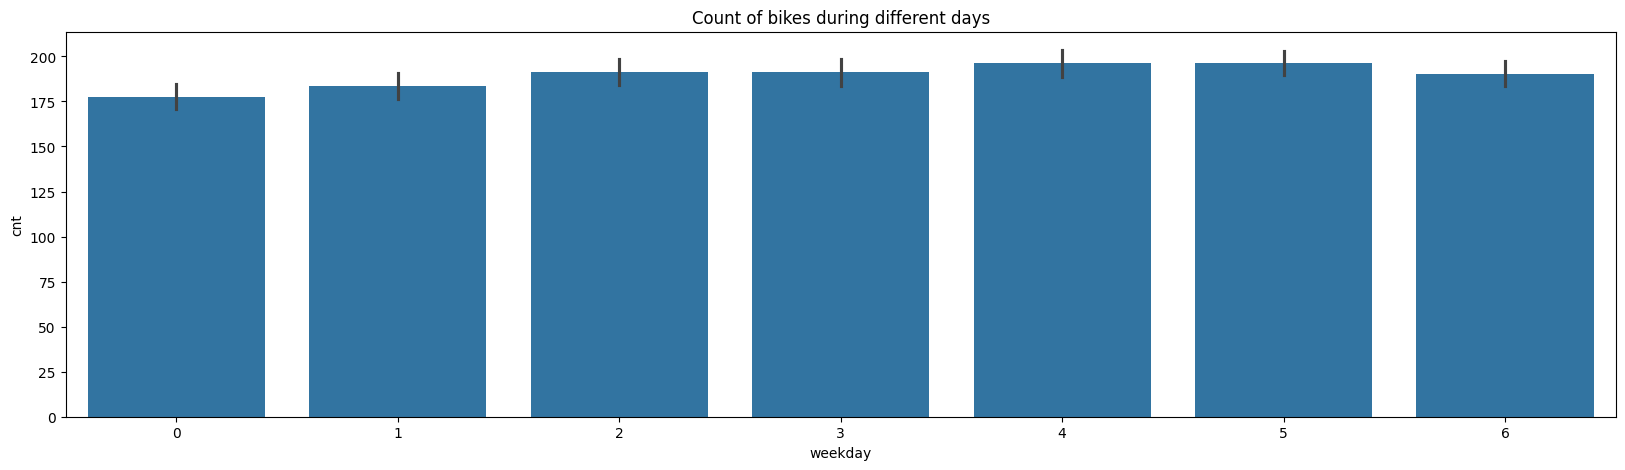

In [154]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Boxplot of bike rentals and days of the week')

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

We can see that the bloxplots are very similar, only on the weekends (0 and 6), we have less outside the 1.5 IQR, which suggests that the data is more concentrated around the mean and median, making these days more predictable.

## Binary features
- holiday
- workingday

### Workingday = workingday

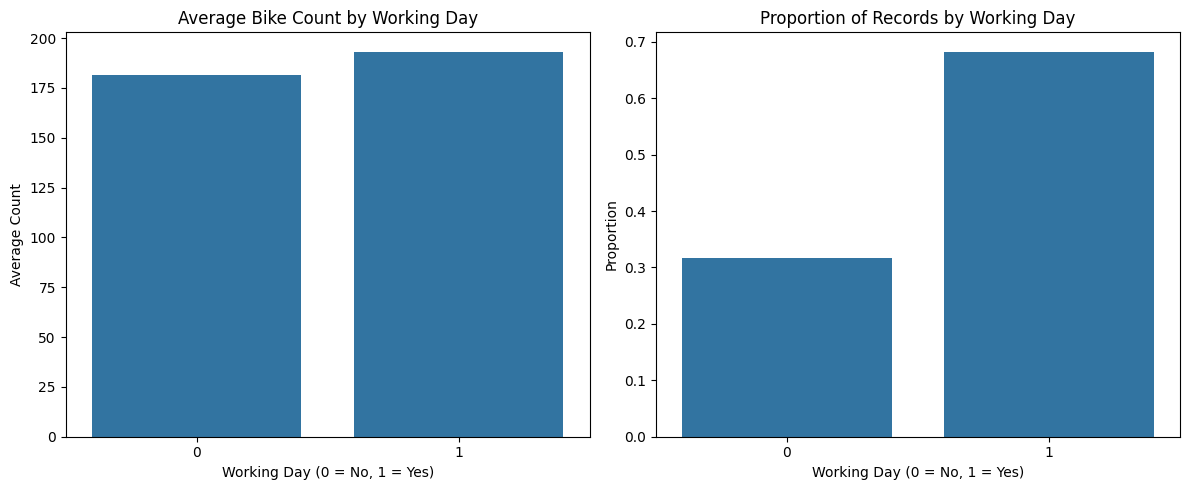

In [155]:
avg_cnt = df.groupby('workingday')['cnt'].mean().reset_index()
proportion = df['workingday'].value_counts(normalize=True).sort_index().reset_index()
proportion.columns = ['workingday', 'proportion']
summary = avg_cnt.merge(proportion, on='workingday')
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='workingday', y='cnt', data=avg_cnt, ax=axs[0])
axs[0].set_title('Average Bike Count by Working Day')
axs[0].set_xlabel('Working Day (0 = No, 1 = Yes)')
axs[0].set_ylabel('Average Count')

sns.barplot(x='workingday', y='proportion', data=proportion, ax=axs[1])
axs[1].set_title('Proportion of Records by Working Day')
axs[1].set_xlabel('Working Day (0 = No, 1 = Yes)')
axs[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

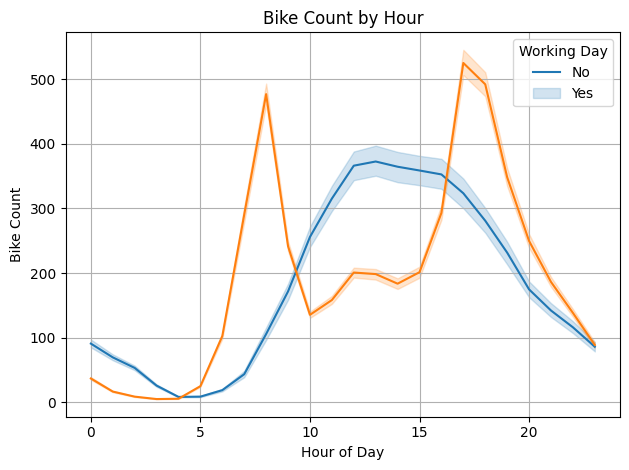

In [156]:
sns.lineplot(data=df, x='hr', y='cnt', hue='workingday')
plt.title('Bike Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Bike Count')
plt.legend(title='Working Day', labels=['No', 'Yes'])
plt.grid(True)
plt.tight_layout()
plt.show()



## Weather features
- Categorical:
    - weathersit
- Numerical:
    - temp
    - atemp
    - hum
    - windspeed

### Categorical: Weather situation = weathersit

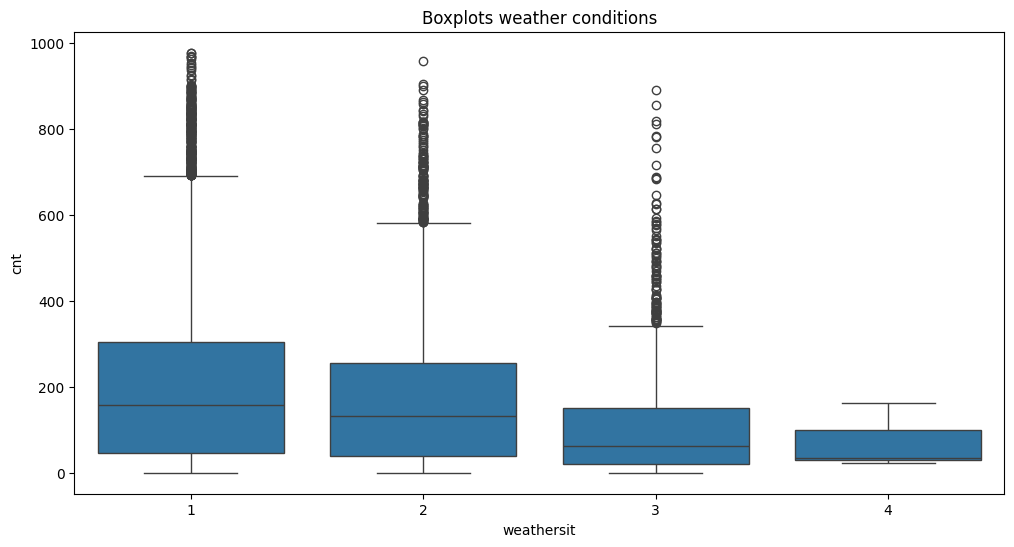

In [157]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Boxplots weather conditions')
plt.show()

[Text(0.5, 1.0, 'Count during different weathers')]

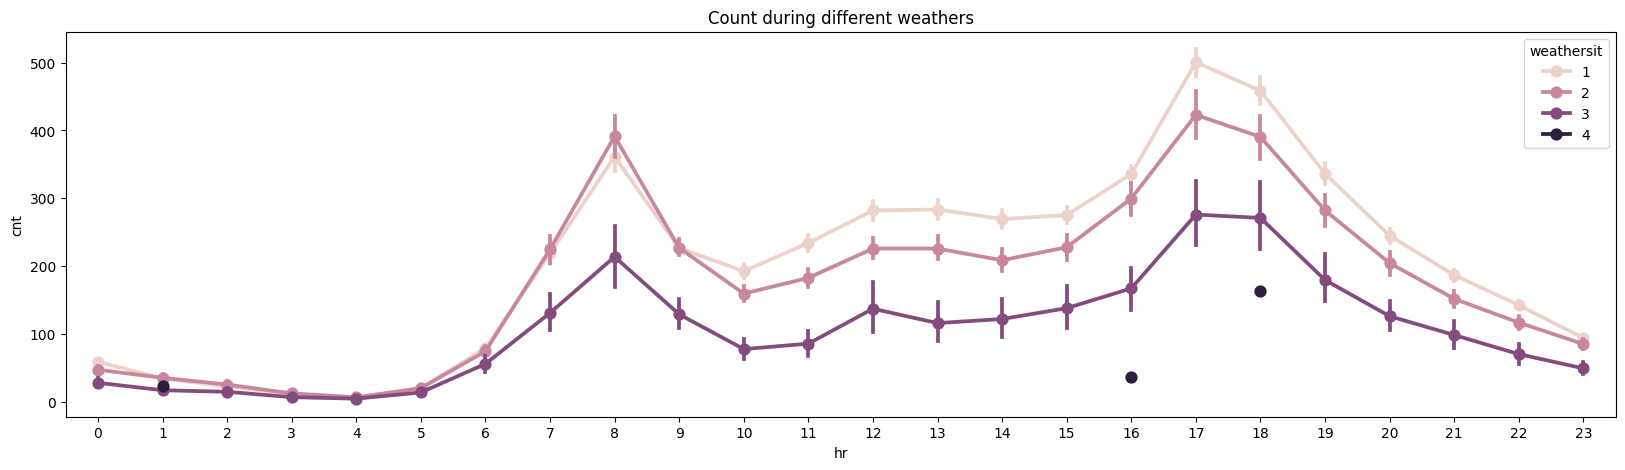

In [158]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hr', y='cnt', hue='weathersit', ax = ax)
ax.set(title='Count during different weathers')

### Numerical

#### Temperature = temp

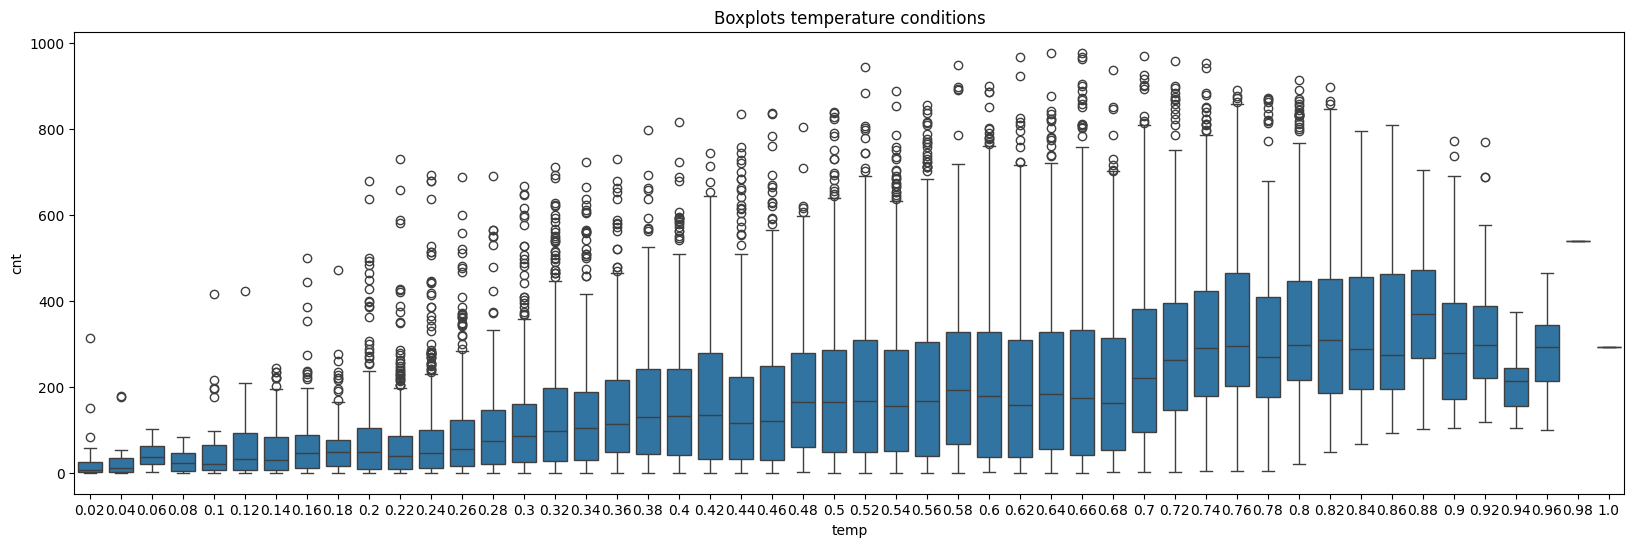

In [159]:
plt.figure(figsize=(20,6))
sns.boxplot(x='temp', y='cnt', data=df)
plt.title('Boxplots temperature conditions')
plt.show()

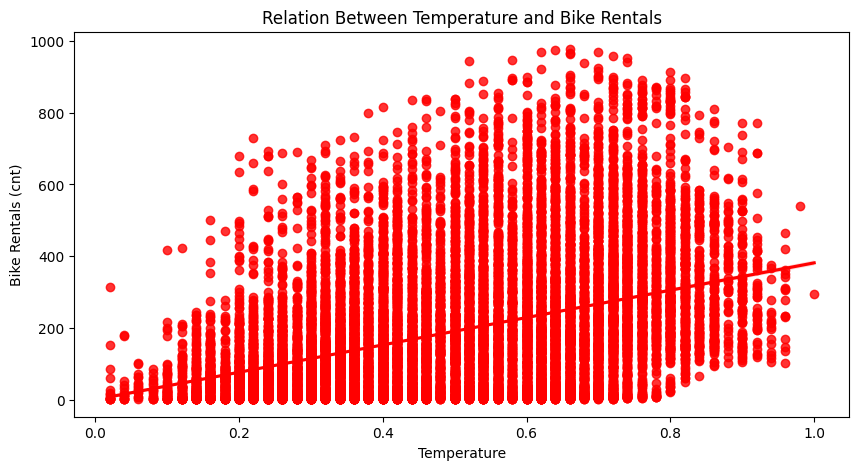

In [160]:
plt.figure(figsize=(10, 5))
sns.regplot(x='temp', y='cnt', data=df, color='red')
plt.title("Relation Between Temperature and Bike Rentals")
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals (cnt)")
plt.show()


#### Perceived temperature = atemp

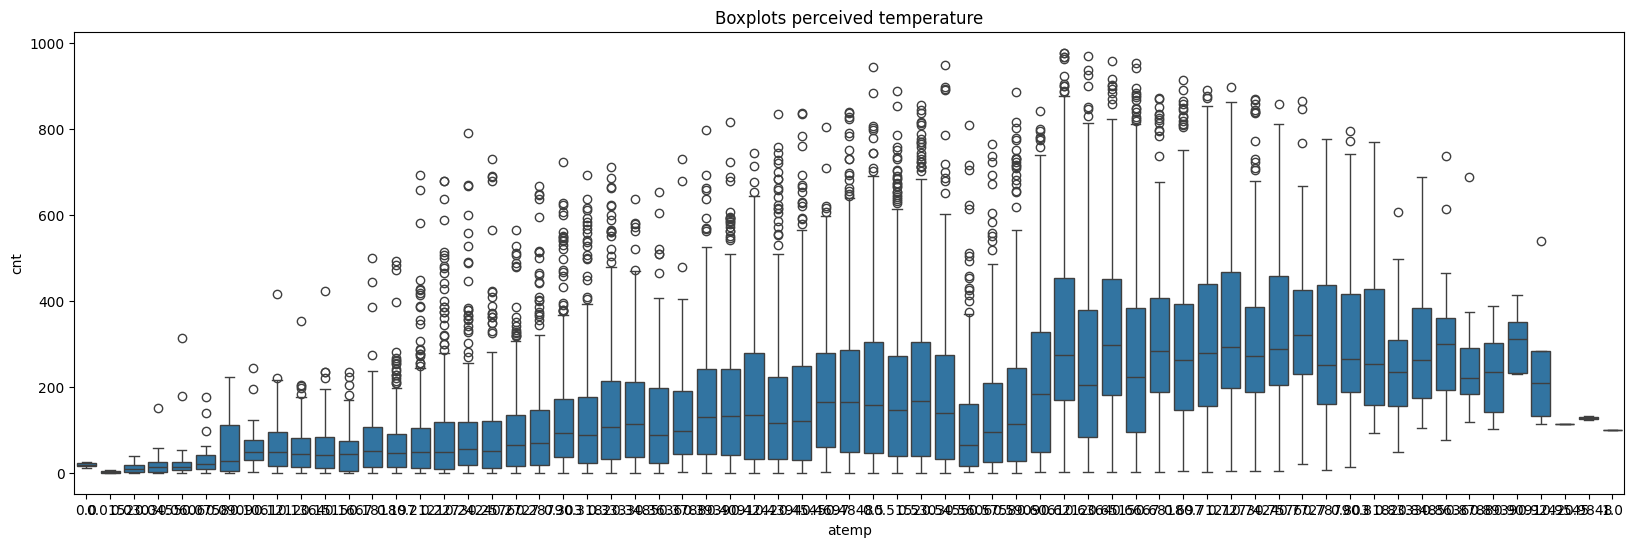

In [161]:
plt.figure(figsize=(20,6))
sns.boxplot(x='atemp', y='cnt', data=df)
plt.title('Boxplots perceived temperature')
plt.show()

One day the perceived temoerature was 50 degrees.

In [162]:
df['atemp'].max()

1.0

#### Wind speed = windspeed

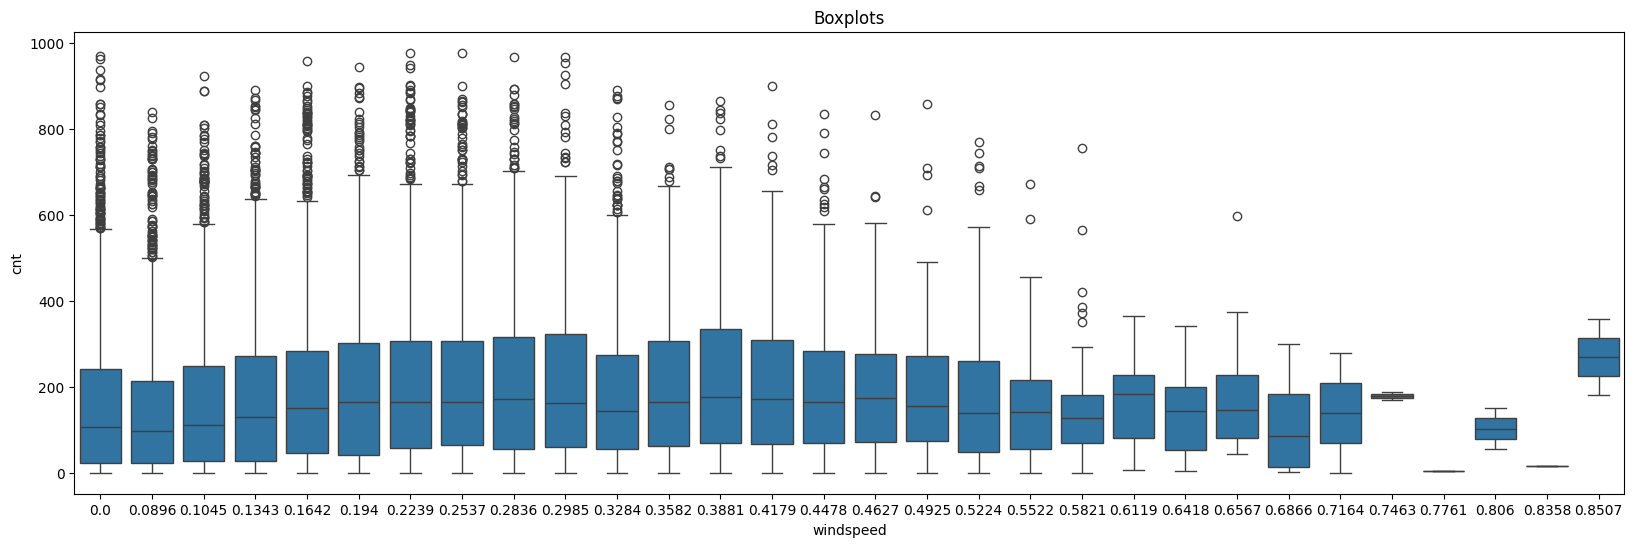

In [163]:
plt.figure(figsize=(20,6))
sns.boxplot(x='windspeed', y='cnt', data=df)
plt.title('Boxplots')
plt.show()

#### Humidity = hum

Humidity of 0% is impossible. Humidity near 100% can be possible in really foggy moments, but not for long periods of time.

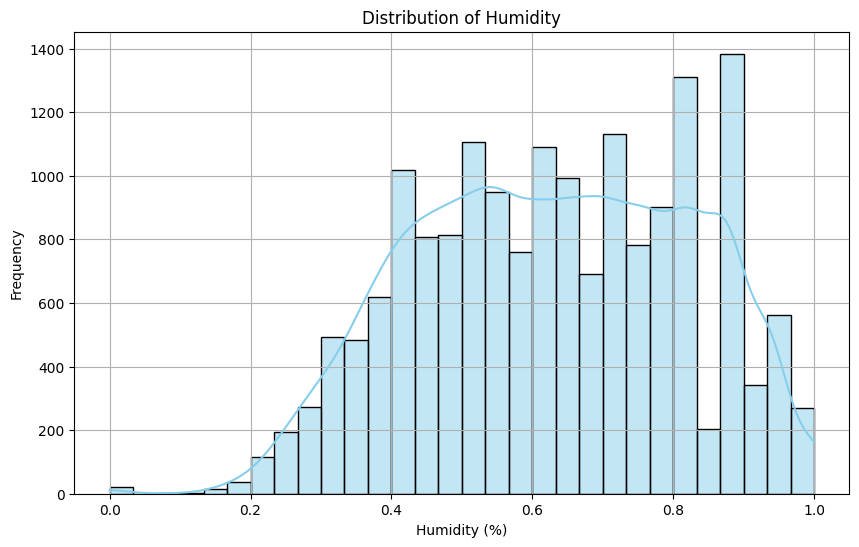

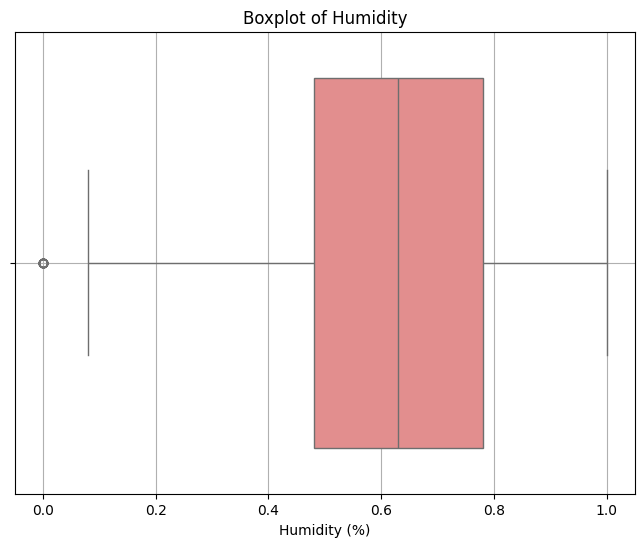

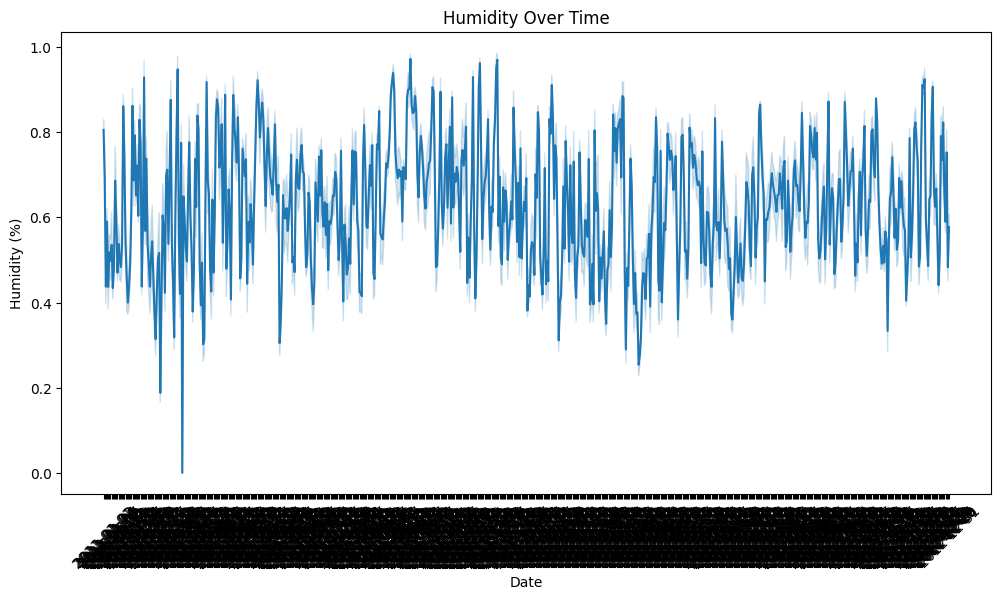

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hum'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['hum'], color='lightcoral')
plt.title("Boxplot of Humidity")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='hum', data=df)
plt.title("Humidity Over Time")
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.show()


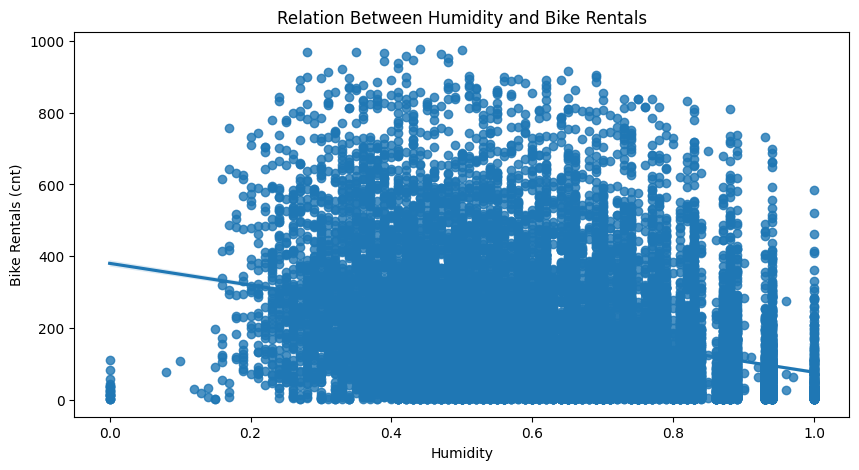

In [165]:
plt.figure(figsize=(10, 5))
sns.regplot(x='hum', y='cnt', data=df)
plt.title("Relation Between Humidity and Bike Rentals")
plt.xlabel("Humidity")
plt.ylabel("Bike Rentals (cnt)")
plt.show()

## Other features
- instant
- casual
- registered

Both casual and registered can be considered data leakage as their sum is the cnt. They are just of the division the cnt into 2 groups, so we can drop them. Instant is just an index, so we can drop it too.

In [166]:
df.drop(columns=['instant', 'casual', 'registered'], inplace=True)

In [167]:
df.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1

missing values...

# Task 2: Data Splitting
Lecture Material: Lecture 8 (slide 4), Lecture 12 (slides 4–5)

- Split the dataset into: Training set (60%), Validation set (20%), Test set (20%). If necessary, reevaluate these percentages when tuning the model.
- Use a random split while preserving temporal order if possible.
- Apply the split before performing any feature engineering or scaling to avoid leakage.

In [168]:
from sklearn.model_selection import train_test_split

df = df.sort_values("dteday").reset_index(drop=True)
df.drop(columns=['dteday'], inplace=True)

train_df, temp_df = train_test_split(df, train_size=0.6, shuffle=False)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=False)

print(f"Training Set: {len(train_df)} rows")
print(f"Validation Set: {len(valid_df)} rows")
print(f"Test Set: {len(test_df)} rows")

Training Set: 10427 rows
Validation Set: 3476 rows
Test Set: 3476 rows


checkk the temporal part

# Task 3: Feature Engineering
Lecture Material: Lecture 9 (slides 2–8), Lecture 12 (slides 4–9)
- Encode cyclical features (hr, weekday) using sine and cosine transforms.
- One-hot encode categorical variables: season, weathersit, and mnth.
- Apply scaling (e.g., StandardScaler) to continuous features: temp, atemp, hum, and windspeed.
- Fit all transformations using only the training set, and apply them to validation and test sets.
- Consider interaction terms such as temp × humidity if they are justified by EDA.
- Remove leaky or redundant features (e.g., atemp if highly collinear with temp).

## 3.1 Encode cyclical features

In [169]:
def encode_cyclical(df):
    df["hr_sin"] = np.sin(2 * np.pi * df["hr"] / 24)
    df["hr_cos"] = np.cos(2 * np.pi * df["hr"] / 24)

    df["weekday_sin"] = np.sin(2 * np.pi * df["weekday"] / 7)
    df["weekday_cos"] = np.cos(2 * np.pi * df["weekday"] / 7)

    df = df.drop(columns=["hr", "weekday"])
    
    return df

train_df = encode_cyclical(train_df)
valid_df = encode_cyclical(valid_df)
test_df = encode_cyclical(test_df)

print(train_df.head())
print(valid_df.head())
print(test_df.head())

   season  yr  mnth  holiday  workingday  weathersit  temp   atemp   hum  \
0       1   0     1        0           0           1  0.24  0.2879  0.81   
1       1   0     1        0           0           2  0.46  0.4545  0.88   
2       1   0     1        0           0           2  0.40  0.4091  0.94   
3       1   0     1        0           0           2  0.40  0.4091  0.87   
4       1   0     1        0           0           2  0.40  0.4091  0.87   

   windspeed  cnt    hr_sin    hr_cos  weekday_sin  weekday_cos  
0     0.0000   16  0.000000  1.000000    -0.781831      0.62349  
1     0.2985   39 -0.258819  0.965926    -0.781831      0.62349  
2     0.2239   28 -0.500000  0.866025    -0.781831      0.62349  
3     0.1940   34 -0.707107  0.707107    -0.781831      0.62349  
4     0.2537   36 -0.866025  0.500000    -0.781831      0.62349  
       season  yr  mnth  holiday  workingday  weathersit  temp   atemp   hum  \
10427       1   1     3        0           1           1  0.50  0.4

## 3.2 One hot encoding

In [170]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["season", "weathersit", "mnth"]

encoder = OneHotEncoder(drop="first", sparse_output=False)

# encoding
train_encoded = encoder.fit_transform(train_df[categorical_features])
valid_encoded = encoder.transform(valid_df[categorical_features])
test_encoded = encoder.transform(test_df[categorical_features])

# remaking the df
encoded_columns = encoder.get_feature_names_out(categorical_features)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_columns, index=train_df.index)
valid_encoded_df = pd.DataFrame(valid_encoded, columns=encoded_columns, index=valid_df.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_columns, index=test_df.index)

# concatenate
train_data = pd.concat([train_df.drop(columns=categorical_features), train_encoded_df], axis=1)
valid_data = pd.concat([valid_df.drop(columns=categorical_features), valid_encoded_df], axis=1)
test_data = pd.concat([test_df.drop(columns=categorical_features), test_encoded_df], axis=1)

print(train_df.head())
print(valid_df.head())
print(test_df.head())


   season  yr  mnth  holiday  workingday  weathersit  temp   atemp   hum  \
0       1   0     1        0           0           1  0.24  0.2879  0.81   
1       1   0     1        0           0           2  0.46  0.4545  0.88   
2       1   0     1        0           0           2  0.40  0.4091  0.94   
3       1   0     1        0           0           2  0.40  0.4091  0.87   
4       1   0     1        0           0           2  0.40  0.4091  0.87   

   windspeed  cnt    hr_sin    hr_cos  weekday_sin  weekday_cos  
0     0.0000   16  0.000000  1.000000    -0.781831      0.62349  
1     0.2985   39 -0.258819  0.965926    -0.781831      0.62349  
2     0.2239   28 -0.500000  0.866025    -0.781831      0.62349  
3     0.1940   34 -0.707107  0.707107    -0.781831      0.62349  
4     0.2537   36 -0.866025  0.500000    -0.781831      0.62349  
       season  yr  mnth  holiday  workingday  weathersit  temp   atemp   hum  \
10427       1   1     3        0           1           1  0.50  0.4

## 3.3 Scaling

In [171]:
continuous_features = ["temp", "atemp", "hum", "windspeed"]

# scale
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train_data[continuous_features])

train_data[continuous_features] = scaler.transform(train_df[continuous_features])
valid_data[continuous_features] = scaler.transform(valid_df[continuous_features])
test_data[continuous_features] = scaler.transform(test_df[continuous_features])

# verify
print('Train set after scaling:')
print(train_df[continuous_features].head())

print('\nValidation set after scaling:')
print(valid_df[continuous_features].head())

print('\nTest set after scaling:')
print(test_df[continuous_features].head())

Train set after scaling:
   temp   atemp   hum  windspeed
0  0.24  0.2879  0.81     0.0000
1  0.46  0.4545  0.88     0.2985
2  0.40  0.4091  0.94     0.2239
3  0.40  0.4091  0.87     0.1940
4  0.40  0.4091  0.87     0.2537

Validation set after scaling:
       temp   atemp   hum  windspeed
10427  0.50  0.4848  0.59     0.1045
10428  0.50  0.4848  0.59     0.0000
10429  0.50  0.4848  0.63     0.0000
10430  0.44  0.4394  0.77     0.1045
10431  0.56  0.5303  0.60     0.1343

Test set after scaling:
       temp   atemp   hum  windspeed
13903  0.74  0.6970  0.70     0.1343
13904  0.70  0.6667  0.84     0.1940
13905  0.70  0.6667  0.84     0.1343
13906  0.70  0.6667  0.84     0.1343
13907  0.70  0.6667  0.84     0.0000


## 3.4 Interaction terms 
such as temp × humidity if they are justified by EDA

## 3.5 Remove leaky or redundant features 
(e.g., atemp if highly collinear with temp).

## 3.6 Feature Selection

<Axes: >

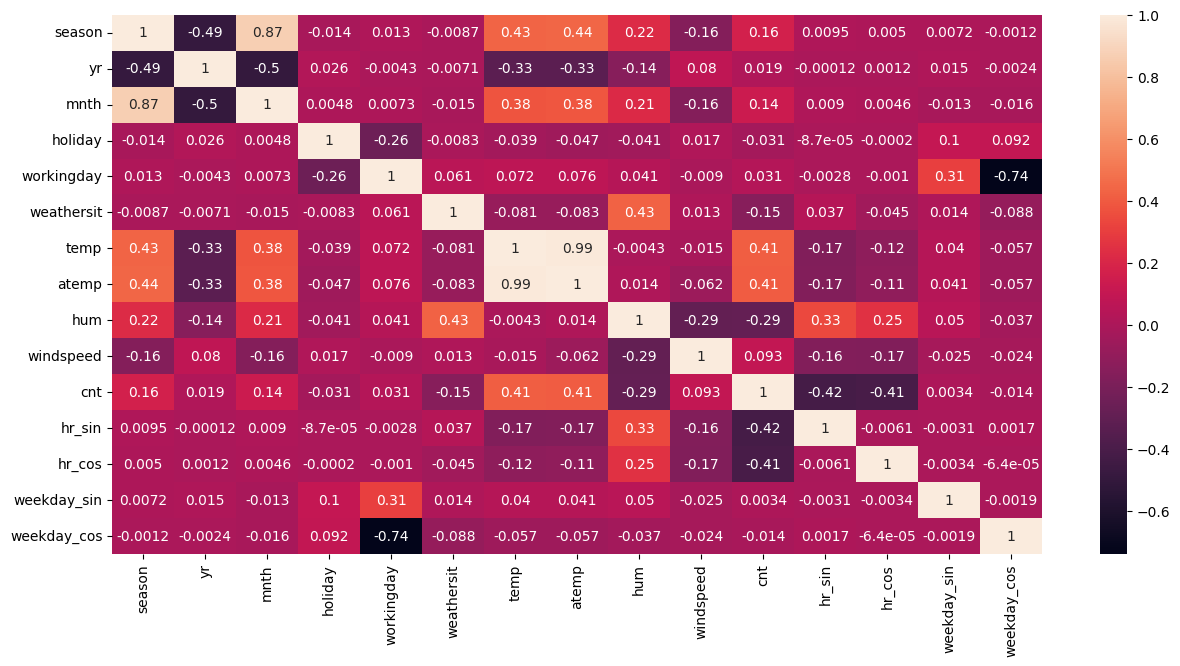

In [172]:
corr = train_df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

In [173]:
X_train = train_df.drop('cnt', axis=1) 
y_train = train_df['cnt']  
X_test = test_df.drop('cnt', axis=1) 
y_test = test_df['cnt']  
X_valid = test_df.drop('cnt', axis=1) 
y_valid = test_df['cnt']  

In [174]:
# Low variance
def remove_low_variance_features(df, threshold=0.1):
    variances = df.var()
    low_variance_features = variances[variances < threshold].index.tolist()
    df_cleaned = df.drop(columns=low_variance_features)
    print(f'Low variance features removed: {low_variance_features}')
    return df_cleaned, low_variance_features

# High correlation
def remove_highly_correlated_features(df, correlation_threshold=0.5):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
    df_cleaned = df.drop(columns=to_drop)
    print(f'Highly correlated features removed: {to_drop}')
    return df_cleaned, to_drop

X_train, low_var_cols = remove_low_variance_features(X_train)
X_valid = X_valid.drop(columns=low_var_cols, errors='ignore')
X_test = X_test.drop(columns=low_var_cols, errors='ignore')
X_train, high_corr_cols = remove_highly_correlated_features(X_train)

X_valid = X_valid.drop(columns=high_corr_cols, errors='ignore')
X_test = X_test.drop(columns=high_corr_cols, errors='ignore')

print("Cleaned X_train:", X_train.shape)
print("Cleaned X_valid:", X_valid.shape)
print("Cleaned X_test:", X_test.shape)


Low variance features removed: ['holiday', 'temp', 'atemp', 'hum', 'windspeed']
Highly correlated features removed: ['mnth', 'weekday_cos']
Cleaned X_train: (10427, 7)
Cleaned X_valid: (3476, 7)
Cleaned X_test: (3476, 7)


In [175]:
# Create copies of the datasets for each model to avoid rerunning feature engineering

# For Linear Regression
X_train_lr = X_train.copy()
X_valid_lr = X_valid.copy()
X_test_lr = X_test.copy()
y_train_lr = y_train.copy()
y_valid_lr = y_valid.copy()
y_test_lr = y_test.copy()

# For Random Forest
X_train_rf = X_train.copy()
X_valid_rf = X_valid.copy()
X_test_rf = X_test.copy()
y_train_rf = y_train.copy()
y_valid_rf = y_valid.copy()
y_test_rf = y_test.copy()

# For Gradient Boosting (XGBoost)
X_train_xgb = X_train.copy()
X_valid_xgb = X_valid.copy()
X_test_xgb = X_test.copy()
y_train_xgb = y_train.copy()
y_valid_xgb = y_valid.copy()
y_test_xgb = y_test.copy()

print("Created copies of datasets for each model. Now you can modify each model independently.")

Created copies of datasets for each model. Now you can modify each model independently.


## Material

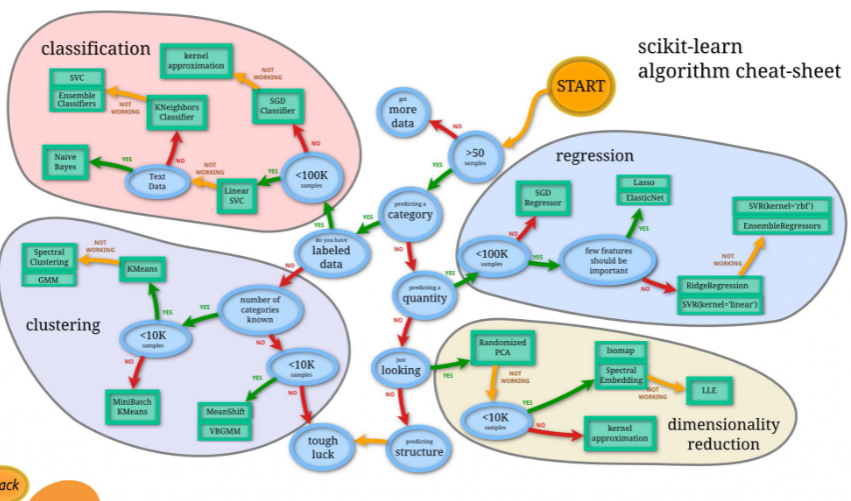

Preconditions for Supervised Learning
1. We have a labeled dataset.
2. We split the dataset into training, validation, and test sets.
3. Records in the validation and test sets are statistically similar.
4. We engineered features and filled missing values using only the training data.
5. We converted all examples into numerical feature vectors.
6. We selected a performance metric that returns a single number.
7. We have a baseline.

Selecting the Learning Algorithm
9
● Time limits the amount of try-and-error we can do with alternative algorithms.
● Process of selection:
○ Explainability: Do we need to understand/explain how/why an algorithm made a prediction?
Opaque: DNN, ensemble models; Transparent: kNN, linear regression, decision tree learning.
○ In-memory vs. out-of-memory: Can we load all the dataset in the RAM? If not, incremental
learning algorithms, i.e., Naïve Bayes and neural network (NN) training algorithms.
○ Number of records and features: What is the maximum dataset/feature size/number
managed by the algorithm? E.g., SVM modest size/number; NN and random forests millions.
○ Nonlinearity of the data: Are data linearly separable? Yes: SVM + linear kernel, linear and
logistic regression; No: DNN or ensembles.
○ Training speed: How much time do we have for (re)training the algorithm? Consider retraining
time (e.g., every hour), opportunities for parallelism (e.g., random tree forests), GPUs (e.g.,
NN)
○ Prediction speed: How fast does a prediction/inference need to be? Consider throughput
requirements. Shallow is faster than deeper algorithms (e.g., DNN, KNN, ensemble)

# Task 4: Baseline Model – Linear Regression
Lecture Material: Lecture 9 (slides 4–7), Lecture 11 (slides 2–4)

- Train a Linear Regression model.
- Evaluate on the validation set using, at least:
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - R² Score
- Plot at least the residuals and analyze their distribution.
- Reflect on bias and variance characteristics of this model. (THISSS)

Note: Make the training and evaluation of the models as uniform as possible to enable proper comparison. Use the same features to train all the models (before refinement and tuning) and use at least MSE, MAE, and R² Score.

In [176]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Usando los datos específicos para el modelo lineal
model.fit(X_train_lr, y_train_lr)

LinearRegression()

In [177]:
y_pred_lr = model.predict(X_valid_lr)

print(f'Predictions on the validation set: {y_pred_lr}')

Predictions on the validation set: [217.92479057 139.07889971 121.07012606 ... 135.43718702 163.42778155
 108.07014253]


In [178]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_valid_lr, y_pred_lr)
mae = mean_absolute_error(y_valid_lr, y_pred_lr)
r2 = r2_score(y_valid_lr, y_pred_lr)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 31760.51773227217
Mean Absolute Error (MAE): 127.04619511813533
R² Score: 0.34535578057223604


In [179]:
comment = input("Add a comment about this model run (changes, insights, notes): ")

log_entry = {
    'Model': "Linear Regression",
    'R2_Score': r2,
    'MSE': mse,
    'MAE': mae,
    'Features_Used': X_train.columns.tolist(),
    'Comment': comment
}

df_log = pd.read_csv("model_log.csv")
df_log = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)

df_log.to_csv("model_log.csv", index=False)

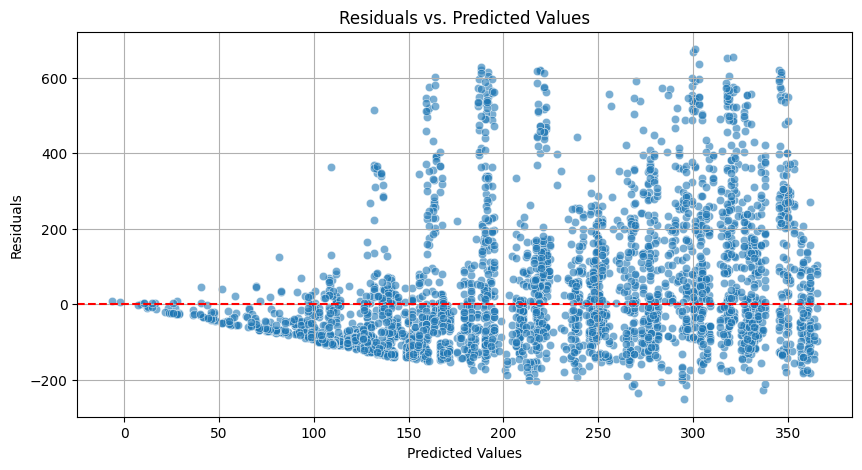

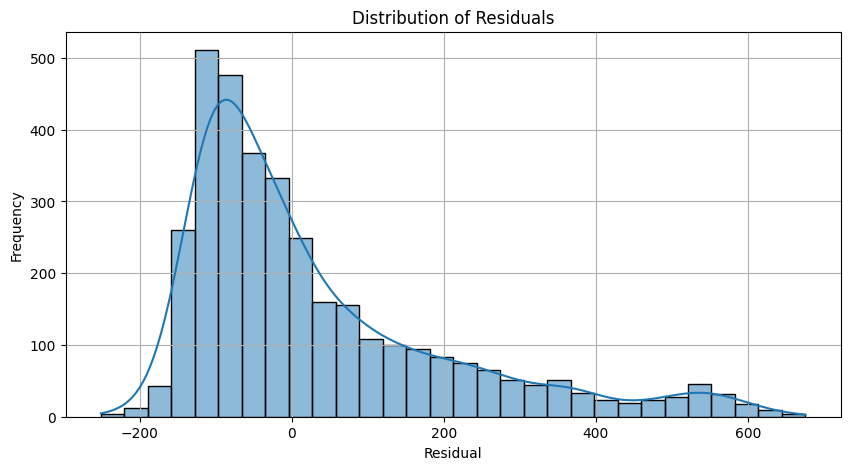

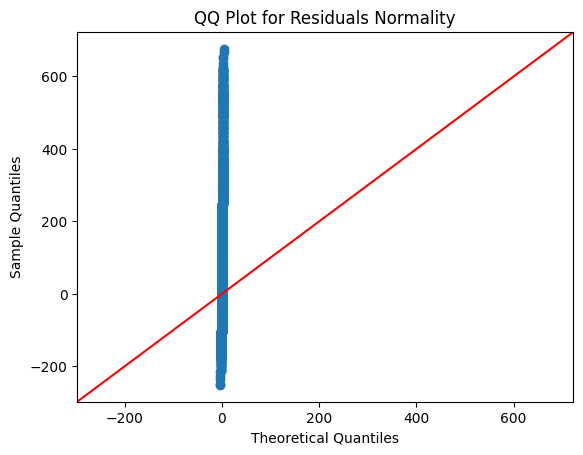

In [180]:
import statsmodels.api as sm

residuals = y_valid_lr - y_pred_lr

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_lr, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

sm.qqplot(residuals, line ='45')  # line='45' ensures a 45-degree reference line
plt.title("QQ Plot for Residuals Normality")
plt.show()

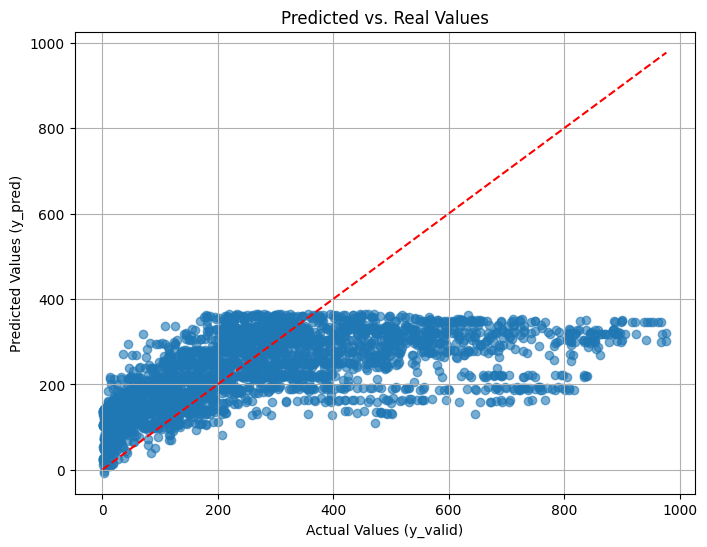

In [190]:
plt.figure(figsize=(8, 6))
plt.scatter(y_valid_lr, y_pred_lr, alpha=0.6)
plt.plot([min(y_valid_lr), max(y_valid_lr)], [min(y_valid_lr), max(y_valid_lr)], color='red', linestyle='--')  # Diagonal line (perfect prediction)
plt.title("Predicted vs. Real Values")
plt.xlabel("Actual Values (y_valid)")
plt.ylabel("Predicted Values (y_pred)")
plt.grid(True)
plt.show()

## Material

● What it does:
- Fits a linear relationship between input features and the target variable.
- Linear relationship: occurs when the change in the target variable (dependent variable) is proportional to the change in an input feature (independent variable).

● How it works:
- Minimizes the sum of squared residuals.

● Preconditions for its applicability:
- Assumes linearity, no multicollinearity, homoscedasticity.
- Multicollinearity: input features are highly correlated, difficult to estimate coefficients accurately.
- Homoscedasticity: the spread of residuals (difference between observed and predicted values) should remain constant regardless of the value of the independent variables.

● Performance Evaluation:
- R^2 score: proportion of dependent variable variance predictable from the independent variables
- Mean Squared Error (MSE): average of the squared differences between actual and predicted values.

● Pros/cons:
- Simple, interpretable but linear relationships and sensitive to outliers

# Task 5: Random Forest Regressor – Model Specification and Training
Lecture Material: Lecture 11 (slides 5–7), Lecture 12 (slides 4–5)
- Train a Random Forest Regressor.
- Use default or initial parameters (e.g., 100 trees, no depth limit) to establish a baseline.
- Evaluate using the same metrics as above.
- Compare with the baseline model and explain observed differences.
- Include at least a feature importance plot and comment on top predictors. (THIS TOO)



In [181]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_valid_rf)


In [182]:
mse_rf = mean_squared_error(y_valid_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_valid_rf, y_pred_rf)
r2_rf = r2_score(y_valid_rf, y_pred_rf)

print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'R² Score: {r2_rf}')

Mean Squared Error (MSE): 19867.29488220081
Mean Absolute Error (MAE): 97.43435125553081
R² Score: 0.5904975523404636


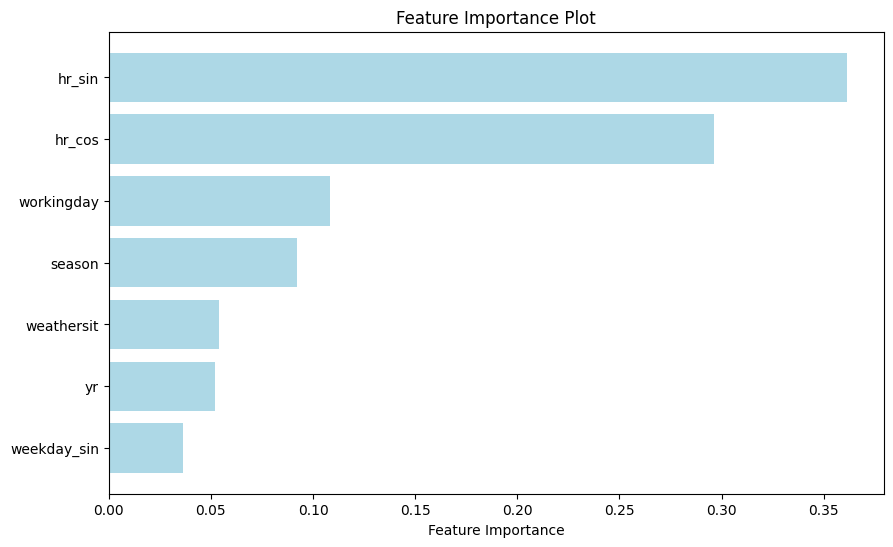

In [183]:
importances = rf_model.feature_importances_

features = X_train.columns
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='lightblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


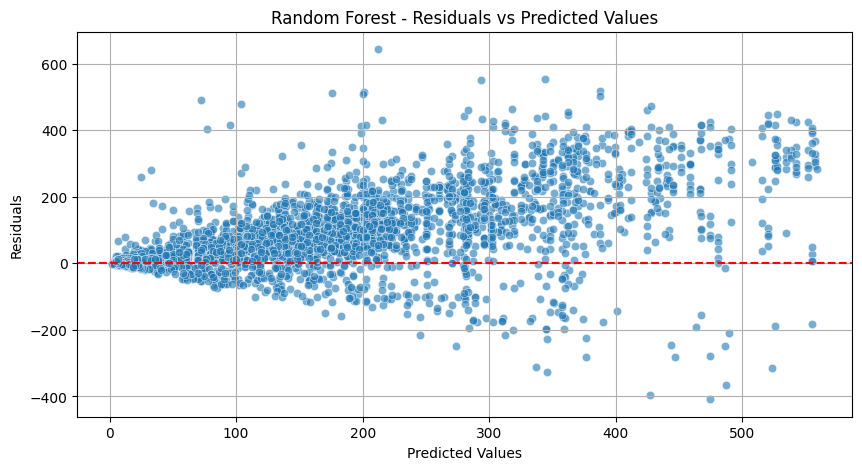

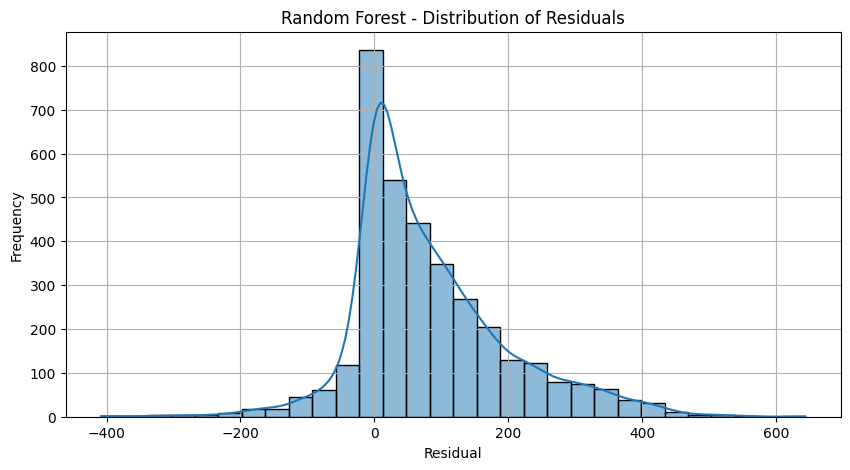

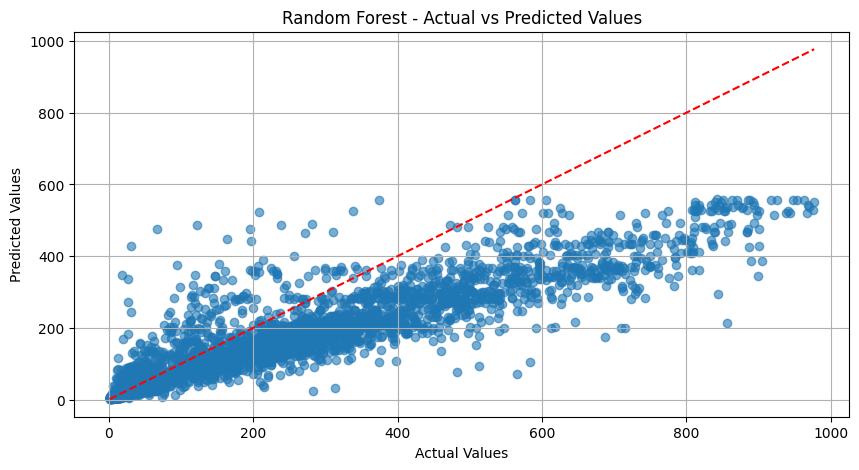

In [192]:
residuals_rf = y_valid - y_pred_rf

# 2. Plot Residuals vs Predicted for Random Forest
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest - Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# 3. Plot Distribution of Residuals for Random Forest
plt.figure(figsize=(10, 5))
sns.histplot(residuals_rf, bins=30, kde=True)
plt.title("Random Forest - Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 4. Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 5))
plt.scatter(y_valid, y_pred_rf, alpha=0.6)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')  # Diagonal line (perfect prediction)
plt.title("Random Forest - Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

In [184]:
comment = input("Add a comment about this model run (changes, insights, notes): ")

log_entry = {
    'Model': "Random forest",
    'R2_Score': r2_rf,
    'MSE': mse_rf,
    'MAE': mae_rf,
    'Features_Used': X_train.columns.tolist(),
    'Comment': comment
}

df_log = pd.read_csv("model_log.csv")
df_log = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)

df_log.to_csv("model_log.csv", index=False)

## Material

● What it does:
- Ensemble of decision trees to improve accuracy and reduce overfitting, i.e., combine weak learners.

● How it works:
- Builds multiple decision trees during training and combines their outputs (by averaging for regression or majority voting for classification) to improve accuracy, reduce overfitting, and handle large datasets.
- Bootstrap sampling (bagging): create multiple subsets of the training data (with replacement).
- Feature Randomness: at each split in a tree, the algorithm considers a random subset of features rather than all features. This reduces the correlation between trees and improves generalization.
- Out-of-Bag (OOB) Error: Uses data points not included in a tree’s bootstrap sample to internally
evaluate the model's performance without requiring a separate validation dataset.

● Preconditions for its applicability:
- Requires tuning hyperparameters, e.g., number of trees, bagging, etc.
● Performance Evaluation:
- Accuracy, MSE.
● Pros/cons:
- Robust, reduce overfitting, computationally expensive. 13

# Task 6: Gradient Boosting Regressor – Model Specification and Training
Lecture Material: Lecture 12 (slides 4–7), Class 10 Training Notebook
- Train a Gradient Boosting Regressor (e.g., XGBoost or LightGBM).
- Use basic parameters to establish initial results.
- Plot at least residuals and compare performance with previous models.
- Note any early signs of overfitting or high variance.

In [185]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Crear y entrenar el modelo XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Hacer predicciones en el conjunto de validación
y_pred_xgb = xgb_model.predict(X_valid_xgb)

# Calcular métricas de rendimiento
mse_xgb = mean_squared_error(y_valid_xgb, y_pred_xgb)
mae_xgb = mean_absolute_error(y_valid_xgb, y_pred_xgb)
r2_xgb = r2_score(y_valid_xgb, y_pred_xgb)

print(f'XGBoost Mean Squared Error (MSE): {mse_xgb}')
print(f'XGBoost Mean Absolute Error (MAE): {mae_xgb}')
print(f'XGBoost R² Score: {r2_xgb}')

# Analizar residuos
residuals = y_valid_xgb - y_pred_xgb


XGBoost Mean Squared Error (MSE): 17995.885019359346
XGBoost Mean Absolute Error (MAE): 93.9597649092607
XGBoost R² Score: 0.6290708419579822


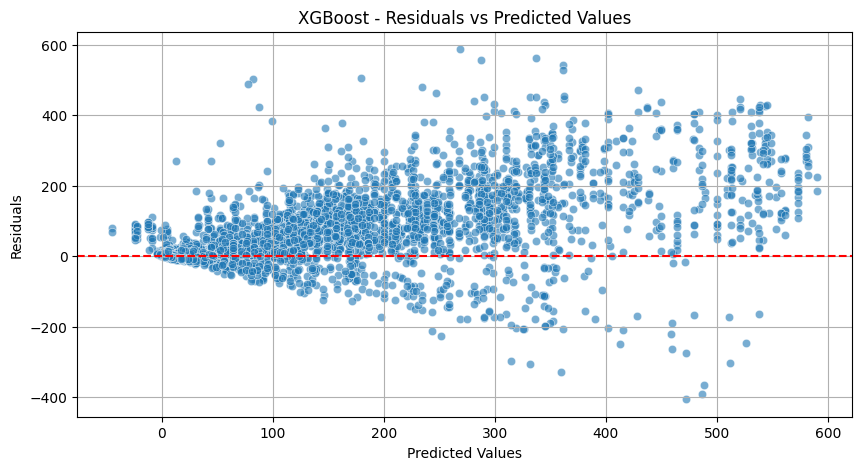

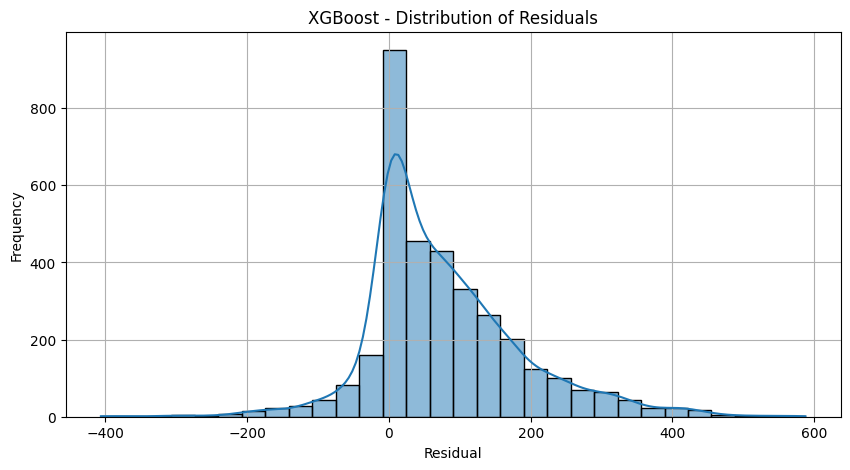

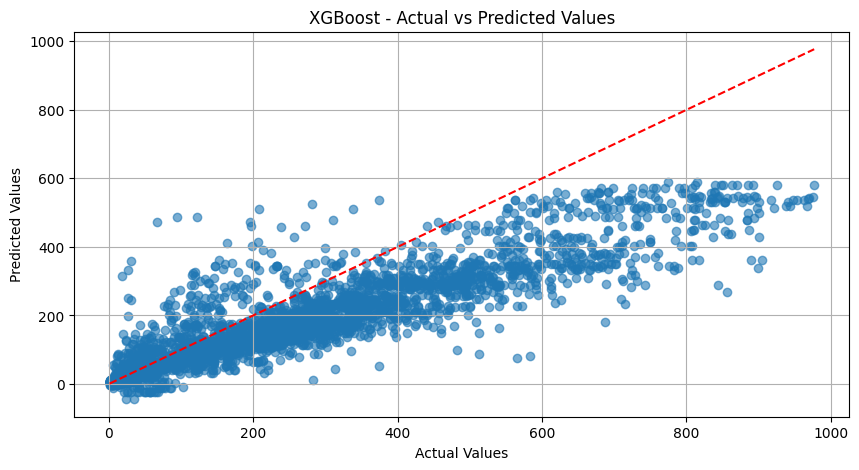

In [193]:
residuals_xgb = y_valid - y_pred_xgb

# 2. Plot Residuals vs Predicted for XGBoost
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("XGBoost - Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# 3. Plot Distribution of Residuals for XGBoost
plt.figure(figsize=(10, 5))
sns.histplot(residuals_xgb, bins=30, kde=True)
plt.title("XGBoost - Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 4. Plot Actual vs Predicted for XGBoost
plt.figure(figsize=(10, 5))
plt.scatter(y_valid, y_pred_xgb, alpha=0.6)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')  # Diagonal line (perfect prediction)
plt.title("XGBoost - Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


In [187]:
comment = input("Add a comment about this model run (changes, insights, notes): ")

log_entry = {
    'Model': "XGBoost",
    'R2_Score': r2_xgb,
    'MSE': mse_xgb,
    'MAE': mae_xgb,
    'Features_Used': X_train.columns.tolist(),
    'Comment': comment
}

df_log = pd.read_csv("model_log.csv")
df_log = pd.concat([df_log, pd.DataFrame([log_entry])], ignore_index=True)

df_log.to_csv("model_log.csv", index=False)

## Material 

● What it does:
- Ensemble learning algorithms that build models by combining multiple weak learners (typically
decision trees) to create a strong predictive model (remember random forests).

● How it works:
- Minimize a loss function (e.g. MSE, log loss) using gradient descent and iteratively improve the model.
- Initialization: simple model to predict mean value (regression) or uniform probabilities (classification).
-  Compute residuals: difference between observed values and model predictions (residuals).
- Fit a weak learner (e.g., decision tree): train it to predict the residuals from the previous step.
- Update the model: Add the predictions from the weak learner to the model, scaled by a learning
rate.
- Iterate: until matching a stopping criterion (e.g., # iterations, no improvement in performance).

● Preconditions for its applicability:
- Hyperparameter tuning (learning rate), regularization (prevent overfitting).

● Performance Evaluation:
- Classification: Accuracy, precision, recall, F1-score, AUC-ROC; regression: MSE, MAE , R^2.

● Pros/cons:
- High predictive accuracy, handles non-linear relationships; computationally expensive, sensitive to 17

# Task 7: Hyperparameter Tuning
Lecture Material: Lecture 12 (slides 6–9), Class 10 Training Notebook
- Tune the Random Forest Regressor:
    - Use Randomized Search CV with 5-fold cross-validation.
    - Tune the following hyperparameters: n_estimators, max_depth, min_samples_split, min_samples_leaf
    - Report: Best parameter combination, Validation performance, Updated feature importance

- Tune the Gradient Boosting Regressor:
    - Use Bayesian Optimization (e.g., via BayesSearchCV).
    - Tune the following hyperparameters: learning_rate, n_estimators, max_depth, subsample
    - Visualize convergence of the optimizer if possible.
    - Report: Best parameters, Cross-validated performance, Impact of tuning on generalization

- Explain whether tuning significantly improved performance or not, and hypothesize why (e.g., model variance, overfitting, flat loss surface, etc.).

Note: Compare pre- and post-tuning performance. Highlight overfitting, underfitting, or convergence issues. This task is part of a broader iterative loop — feel free to return to earlier tasks if the results are suboptimal.

In [196]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search with 5-fold cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf_model,
                                      param_distributions=param_grid_rf,
                                      n_iter=10,  # Number of random searches
                                      cv=5,  # 5-fold cross-validation
                                      verbose=1,
                                      n_jobs=-1,
                                      random_state=42)

# Fit the model
random_search_rf.fit(X_train_rf, y_train_rf)

# Best parameter combination
best_params_rf = random_search_rf.best_params_
print(f"Best Parameters: {best_params_rf}")

# Validation performance
y_pred_rf = random_search_rf.best_estimator_.predict(X_valid_rf)  # Assuming X_valid and y_valid are defined
mse_rf = mean_squared_error(y_valid_rf, y_pred_rf)
r2_rf = r2_score(y_valid_rf, y_pred_rf)

print(f"Validation MSE: {mse_rf}")
print(f"Validation R^2: {r2_rf}")

y_pred_rf_test = random_search_rf.best_estimator_.predict(X_test_rf)
mse_rf_test = mean_squared_error(y_test_rf, y_pred_rf_test)
r2_rf_test = r2_score(y_test_rf, y_pred_rf_test)

print(f"Test MSE (Random Forest): {mse_rf_test}")
print(f"Test R^2 (Random Forest): {r2_rf_test}")

# Updated feature importance
feature_importances_rf = random_search_rf.best_estimator_.feature_importances_
print(f"Feature Importances: {feature_importances_rf}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Validation MSE: 19778.69568068084
Validation R^2: 0.5923237491175404
Test MSE (Random Forest): 19778.69568068084
Test R^2 (Random Forest): 0.5923237491175404
Feature Importances: [0.09055754 0.0527138  0.10990343 0.05259059 0.36650547 0.29897755
 0.02875162]
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Validation MSE: 19778.69568068084
Validation R^2: 0.5923237491175404
Test MSE (Random Forest): 19778.69568068084
Test R^2 (Random Forest): 0.5923237491175404
Feature Importances: [0.09055754 0.0527138  0.10990343 0.05259059 0.36650547 0.29897755
 0.02875162]


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

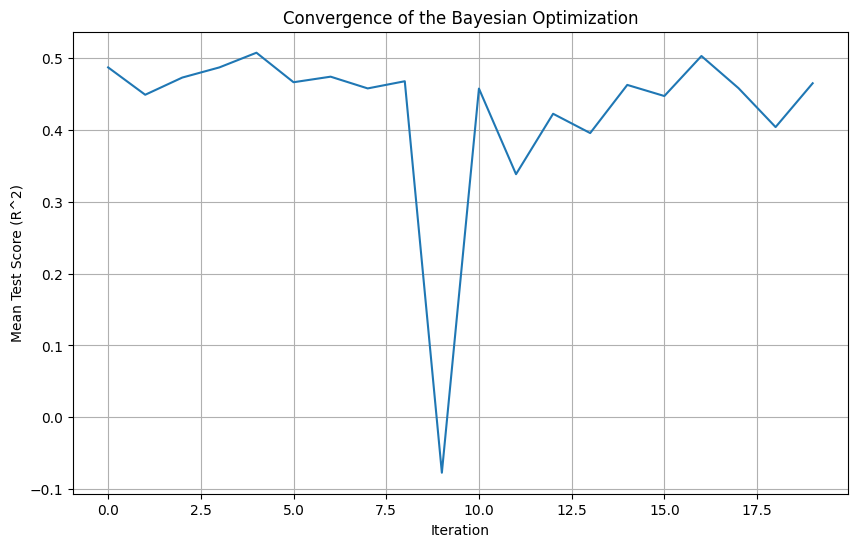

In [197]:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the search space for Bayesian Optimization
param_space_gb = {
    'learning_rate': (0.001, 0.1, 'uniform'),
    'n_estimators': (50, 200, 'uniform'),
    'max_depth': (3, 10),  # Tree depth should be between 3 and 10
    'subsample': (0.5, 1.0, 'uniform')
}

# Perform Bayesian Optimization
bayes_search_gb = BayesSearchCV(estimator=gb_model,
                                search_spaces=param_space_gb,
                                n_iter=20,  # Number of iterations for the optimization
                                cv=5,  # 5-fold cross-validation
                                n_jobs=-1,
                                random_state=42,
                                verbose=1)

# Fit the model
bayes_search_gb.fit(X_train_xgb, y_train_xgb)

# Best parameter combination
best_params_gb = bayes_search_gb.best_params_
print(f"Best Parameters: {best_params_gb}")

# Cross-validated performance
y_pred_gb = bayes_search_gb.best_estimator_.predict(X_valid)
mse_gb = mean_squared_error(y_valid_xgb, y_pred_gb)
r2_gb = r2_score(y_valid_xgb, y_pred_gb)

print(f"Validation MSE: {mse_gb}")
print(f"Validation R^2: {r2_gb}")


y_pred_gb_test = bayes_search_gb.best_estimator_.predict(X_test)
mse_gb_test = mean_squared_error(y_test, y_pred_gb_test)
r2_gb_test = r2_score(y_test, y_pred_gb_test)

print(f"Test MSE (Gradient Boosting): {mse_gb_test}")
print(f"Test R^2 (Gradient Boosting): {r2_gb_test}")


# Visualize convergence of the optimizer
# This plot shows how the optimizer converges over time
plt.figure(figsize=(10, 6))
plt.plot(bayes_search_gb.cv_results_['mean_test_score'])
plt.title("Convergence of the Bayesian Optimization")
plt.xlabel("Iteration")
plt.ylabel("Mean Test Score (R^2)")
plt.grid(True)
plt.show()


# Task 8: Iterative Evaluation and Refinement
Lecture Material: Lecture 9 (slides 6–7), Lecture 11 (slides 3–4), Lecture 12 (slide 9)
- Based on model results, revisit EDA and feature engineering if needed. For example:
    - Do new interaction terms help?
    - Should you drop or transform certain features?
    - Are there outliers that are harming performance?

- Model tuning and evaluation (Tasks 4–8) are iterative. Based on performance, you may revisit:
    - Task 3 (Feature Engineering)
    - Add new transformations
    - Adjust model complexity
    - Document all iterations and reasoning thoroughly in the notebook.

Retrain, re-evaluate, and re-tune your models as needed.